In [262]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [263]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [264]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

In [265]:
# Plot just the "Settle" column from the dataframe:
from pathlib import Path

df = pd.read_csv(
    Path("../Homework_Folder/yen.csv"), parse_dates=True, index_col="Date"
)

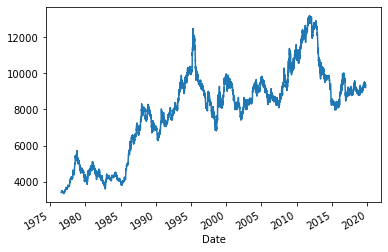

In [266]:
df['Settle'].plot()

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [267]:
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


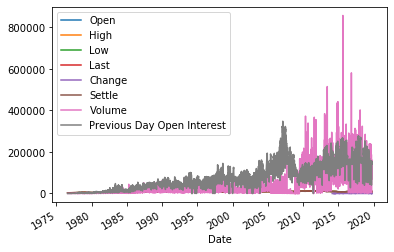

In [268]:
df.plot()

In [269]:
# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(df['Settle'])

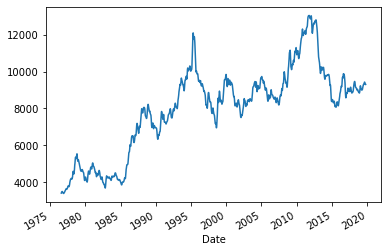

In [270]:
ts_trend.plot()

In [271]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
df.Settle

Date
1976-08-02    3401.0
1976-08-03    3401.0
1976-08-04    3401.0
1976-08-05    3401.0
1976-08-06    3401.0
               ...  
2019-10-09    9338.0
2019-10-10    9303.5
2019-10-11    9251.0
2019-10-14    9265.0
2019-10-15    9221.5
Name: Settle, Length: 10902, dtype: float64

In [272]:
df1 = pd.DataFrame(ts_noise, ts_trend, columns = ['noise', 'trend'])
                

In [273]:
df1

,noise,trend
Settle_trend,,
3390.825312,NaN,NaN
3394.761444,NaN,NaN
3398.703935,NaN,NaN
3402.663044,NaN,NaN
3406.650464,NaN,NaN
...,...,...
9313.060753,NaN,NaN
9309.368559,NaN,NaN
9305.454594,NaN,NaN


In [274]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtIAAAHYCAYAAABgGQ9RAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd3ic1ZX48e99p6tXd+NesI0L2HQCxNgBEkhICCwklN1saMmG3VRI2E2DQH7JhkBCGgmBhB6zCQRCKKYb4wbG3di4SZZs9Taa+r7398c7Mxr1kSxpJM35PA+PZ942d4Q0c+bMuecqrTVCCCGEEEKIvjHSPQAhhBBCCCFGIgmkhRBCCCGE6AcJpIUQQgghhOgHCaSFEEIIIYToBwmkhRBCCCGE6AcJpIUQQgghhOgHCaSFEGKYUUp9Tyn1cLrHMRwopWYqpaRPqxBiWJJAWggh+kgpdaZS6m2lVKNSqk4ptUYptSzFc7VSambS/XOUUuWDN9pjo5TarpRqif1nKqWCSfe/ne7xCSFEOjnTPQAhhBhJlFJ5wLPAjcCTgBs4Cwilc1yDRWs9P35bKfUa8LDW+vfdHa+Ucmqto0MxNiGESDfJSAshRN/MBtBaP6a1NrXWAa31i1rrLfEDlFL/ppTaqZSqV0q9oJSaEtv+RuyQ92MZ3WuA54EJSVneCR0fUCl1aiwD3qCUel8pdU5XA1NK3aKUWtVh2z1KqXtjt69VSu1TSjUrpfYrpT53rD8MpdS/K6XeUErdq5SqA25L2r4r9jN4Xik1ObbdGcvKX6+U2hvbf2/S9RxKqbuVUrVKqQ+B8491jEIIMVgkkBZCiL75ADCVUg8ppS5QShUm71RKfQr4NvBpoBR4E3gMQGv9kdhhi7TWOVrrh4ALgIrY/RytdUWH600EngNuB4qArwNPKaVKuxjbY8CFsaw5SikHcBnwqFIqG7gXuEBrnQucDmw+1h9GzOnAztjz/bFS6lLgG8AnY9vWAY92OOdC4CRgCfB5pdR5se03AiuBRcDJsfELIcSwJIG0EEL0gda6CTgT0MD9QLVS6hml1NjYIdcDd2qtd8ZKHH4ELI5npfvh88A/tNb/0FpbWuuXgI3YgWjHsR0E3gU+Fdv0UaBVa/1O7L4FLFBK+bTWlVrr7f0cU0eHtNa/jmfosX8GP9Ja7479DG4HTo59KIi7U2vdqLU+ALwGLI5tvwy4W2tdrrWuBe4aoDEKIcSAk0BaCCH6KBYkX6u1ngQsACYAP4/tngLcEyvDaADqAAVM7PpqvZoCfDZ+vdg1zwTGd3P8o8AVsdtXxu6jtfYDlwM3AJVKqeeUUnP7OaaOyroY831J463BDuInJR1zJOl2K5ATuz2hw/UODtAYhRBiwEkgLYQQx0BrvQt4EDugBjsIvF5rXZD0n09r/XZ3l+jlIcqAP3e4XrbWurtM7V+Ac5RSk4BLSCqp0Fq/oLVegR2E78LOqA+Ejs+hDPhCFz+DdSlcqxKYnHT/uAEaoxBCDDgJpIUQog+UUnOVUl+LBarEJtFdAcTLJ34D3KqUmh/bn6+U+mzSJY4C0zvcL1ZK5XfzkA8DFymlPhabiOeNtcyb1NXBWutq7FKJPwL7tdY7Y+MYq5S6OFYrHQJaALPPP4DU/Ab4jlLq+NhjF8TqplPxJPCfSqmJSqli4FuDNEYhhDhmEkgLIUTfNAOnAOuUUn7sAHob8DUArfVfgR8DjyulmmL7Lkg6/3vAQ7Gyh8tiGe3HgH2xbe26dmity7An7X0bqMbO9n6Dnl+/HwXOo/0EPyM2xgrscpOzgZsAlFJnKaVa+vhz6JbW+i/Az4C/xH4GW4CPpXj6r4HVwFZgA7Cq58OFECJ9lNayYJQQQgghhBB9JRlpIYQQQggh+kECaSGEEEIIIfpBAmkhhBBCCCH6QQJpIYQQQggh+kECaSGEEEIIIfrBme4B9FdJSYmeOnVquochhBBCCCFGsU2bNtVorUu72jdiA+mpU6eycePGdA9DCCGEEEKMYkqpg93tk9IOIYQQQggh+kECaSGEEEIIIfpBAmkhhBBCCCH6YcTWSAshhBBCiIETiUQoLy8nGAymeyhp4fV6mTRpEi6XK+VzJJAWQgghhBCUl5eTm5vL1KlTUUqlezhDSmtNbW0t5eXlTJs2LeXzpLRDCCGEEEIQDAYpLi7OuCAaQClFcXFxn7PxEkgLIYQQQgiAjAyi4/rz3CWQFkIIIYQQw8Ydd9zB/PnzWbhwIYsXL2bdunXdHvvggw9SUVGRuP/zn/+c1tbWxP2pU6dSU1MzaGOVQFoIIYQQQgwLa9eu5dlnn+Xdd99ly5YtvPzyy0yePLnb43sLpAebBNJCCCGEEGJYqKyspKSkBI/HA0BJSQkTJkxg06ZNnH322Zx00kl87GMfo7KyklWrVrFx40Y+97nPsXjxYu655x4qKio499xzOffccztd++GHH+bkk09m8eLFXH/99Zimeczjla4dQgghhBCine//fTs7KpoG9JrzJuTx3Yvm93jMypUr+cEPfsDs2bM577zzuPzyyzn99NP5j//4D55++mlKS0t54okn+M53vsMDDzzAL3/5S37605+ydOlSAO6++25effVVSkpK2l13586dPPHEE6xZswaXy8VNN93EI488wtVXX31Mz0kCaSGEEEIIMSzk5OSwadMm3nzzTV599VUuv/xybrvtNrZt28aKFSsAME2T8ePH9+m6q1evZtOmTSxbtgyAQCDAmDFjjnm8EkgLIYQQQoh2esscDyaHw8E555zDOeecwwknnMB9993H/PnzWbt2bb+vqbXmmmuu4c477xzAkUqNtBBCCCGEGCZ2797Nnj17Evc3b97M8ccfT3V1dSKQjkQibN++HYDc3Fyam5sTx3e8H7d8+XJWrVpFVVUVAHV1dRw8ePCYxyuBtBCi3wJhk/01/nQPQwghxCjR0tLCNddcw7x581i4cCE7duzgBz/4AatWreJb3/oWixYtYvHixbz99tsAXHvttdxwww0sXryYQCDAddddxwUXXNBpsuG8efO4/fbbWblyJQsXLmTFihVUVlYe83iV1rrnA5R6APgEUKW1XhDbVgQ8AUwFDgCXaa3rld3J+h7gQqAVuFZr/W7snGuA22KXvV1r/VBs+0nAg4AP+Adws+5tUMDSpUv1xo0b+/JchRAD7F//uJ5Xd1fz4Y8uxGFkbhN/IYQYDXbu3Mnxxx+f7mGkVVc/A6XUJq310q6OTyUj/SBwfodttwCrtdazgNWx+wAXALNi/10H/Do2gCLgu8ApwMnAd5VShbFzfh07Nn5ex8cSQgxTr+6uBqApEOnzuVHT4vdv7qM52PdzhRBCiOGg10Baa/0GUNdh8yeBh2K3HwI+lbT9T9r2DlCglBoPfAx4SWtdp7WuB14Czo/ty9Nar41lof+UdC0hxAjR0I9A+vENZdz+3E4eevvAwA9ICCGEGAL9rZEeq7WuBIj9G+8fMhEoSzquPLatp+3lXWzvklLqOqXURqXUxurq6n4OXQgx0Bpaw30+Z+MB+/N5tkeaBwkhhBiZBnqyYVdFkrof27uktf6d1nqp1nppaWlpP4cohBhoDa19z0i3hKIARExroIcjhBBCDIn+BtJHY2UZxP6tim0vB5IXRJ8EVPSyfVIX24UQw9zRpmDi9r8+uIEb/rwppfNqWkK8uP1IIpBuCUYHZXxCCCHEYOtvIP0McE3s9jXA00nbr1a2U4HGWOnHC8BKpVRhbJLhSuCF2L5mpdSpsY4fVyddSwgxyMJRi5+9uJvWcN+D2V1H7D6dEwt8APxz+xFSaLjDvz+0kev+vImDta0ANIckkBZCCDEy9RpIK6UeA9YCc5RS5UqpLwB3ASuUUnuAFbH7YLev2wfsBe4HbgLQWtcBPwQ2xP77QWwbwI3A72PnfAg8PzBPTQjRm8fWH+LeV/by29f39fncSNQuyfjN50/izJklADQFeg+KKxoCAFQ22hltyUgLIYQAaGho4Fe/+tWgXT8nJ2fAr9nrLB+t9RXd7FrexbEa+FI313kAeKCL7RuBBb2NQwgx8Or89iTBVDLJHcVrm11OxWeXTuKtvTVUt4TIz3L1eF6W29Huvr8f2XAhhBCjTzyQvummm9ptN00Th8PRzVnpJdPlhchgwYgJgNfd9xeocDyQdhiU5HgAqG4OMXNMz5/4va72j9UsGWkhhBDALbfcwocffsjixYtxuVzk5OQwfvx4Nm/ezI4dO3j44Ye59957CYfDnHLKKfzqV7/C4XCQk5PDzTffzLPPPovP5+Ppp59m7Nix7N+/nyuvvJJoNMr55w/OMiUSSAuRwVrDdiDtc/U9kI6Ydhbb7TCYXJgFwP4aP6fNKO7xPF+HoL1FaqSFEGL4ef4WOLJ1YK857gS44K5ud991111s27aNzZs389prr/Hxj3+cbdu2MW3aNHbu3MkTTzzBmjVrcLlc3HTTTTzyyCNcffXV+P1+Tj31VO644w6++c1vcv/993Pbbbdx8803c+ONN3L11Vdz3333DexziRno9ndCiBEkEMtIOx19fymIJGWkJxf5yPe52Hq4sdfzkoP2CfleqZEWQgjRpZNPPplp06YBsHr1ajZt2sSyZctYvHgxq1evZt8+e36P2+3mE5/4BAAnnXQSBw4cAGDNmjVccYVdoXzVVVcNyhglIy1EBouXdoSjfe/l3BZIK5RSjM/3UtMS6vW85BrpaaXZ7Kv29/mxhRBCDLIeMsdDJTs7O3Fba80111zDnXfe2ek4l8uF3fwNHA4H0Whbgia+fbBIRlqIDGZadnlGKGr2+dx48O1y2i8jLoeRuF5P8n3uxO2pxdlS2iGEEAKA3Nxcmpubu9y3fPlyVq1aRVWVvXRJXV0dBw8e7PF6Z5xxBo8//jgAjzzyyMAONkYCaSEymBXr1tG/jLR9rsuwX0YchkpplUIjKTlQnO2mJRTtV9cQIYQQo0txcTFnnHEGCxYs4Bvf+Ea7ffPmzeP2229n5cqVLFy4kBUrVlBZWdnj9e655x7uu+8+li1bRmNj76WH/SGlHUJksFAsgA71EkhvOlhPRUOAixZNSGyLJpV2xP9NJSMdTTom2+NEa3vSY7ZHXo6EECLTPfroo93uu/zyy7n88ss7bW9paUncvvTSS7n00ksBmDZtGmvXrk3su+WWWwZwpDZ55xIig6VaI/2ZX78N0C6QjpgWStmZaLD/jZqpB9I/uXRhIqvdHIxKIC2EEGLEkdIOITJYMBLPSKdWI20lZZPDpsblMBITOZyGQdTqvbQjalrMGpPDZ5dOJs9nB8/NwUhfhy6EEEKknQTSQmSwvnbtqG8NJ25HTAt3Uts8Zx9KO+JZ7DyvvQpikwTSQgghRiAJpIXIYPFAurca6bialvaBdLw+GsBpqESpRk9My85kA+T57EC6MSCBtBBCDAeZPPm7P89dAmkhMli8tKO3jHRprr0E+Ms7jya2RUyr3UIuTiO19ncR00rKSNulHU0BaYEnhBDp5vV6qa2tzchgWmtNbW0tXq+3T+fJ7B4hMlgwmlpGeu64XKqbQ+ysbALsF5xQtH1ph8OhiKRQI21npGOBtE9KO4QQYriYNGkS5eXlVFdXp3soaeH1epk0aVKfzpFAWogMFginViMdzzQHIyaBsMnVD6xjw4F6phZnJY5xGinWSJttNdL5Phcuh5LVDYUQYhhwuVyJJblFaqS0Q4gMFQibSX2ke+7aEW9Z1xo2ueL+d9hwoJ7JRT6+8tHpUL4R6g/aXTtSan9n4TTaVkNcOW8cf9t8OFGvLYQQQowUEkgLkaEO1rVlgVPNSAciJpvLGgBYOqWITx+6E36/HO5ZyCeP3pda+ztL40yapHjlKcfR0Brh+W09r1AlhBBCDDcSSAuRoQ7U2IH0hHxvrzXS8Yx0vBQEYLxZCe8/Bos/B/M+yZm1TzLBrOj1caOmxpm0Tvhp04spyXHz1p7a/jwNIYQQIm0kkBYiQ1U2BgGYWpKdQkba3t+aFEifXvsUKAd89Da48KeYysUV5jO9Pq5p6URpB4BhKHI8TsJmai34hBBCiOFCAmkhMlRVcwinoRiXl0JG2mwr7QBYbmzizNq/wJLPQ94EyBnDzqKPcoF+C+oP9HitiGXhSCrtAHA6jESwLoQQQowUEkgLkaGqm0OU5HjwuBy9BtJmh9KOW5yPU+GdARf8OHHMuvFXY2LAHy8Ef0231wpF2rfNg9QXcxFCCCGGEwmkhchQVc0hxuR58DgNwr107UiebJhPC7OMw7yfvxxcvsQx9Tkz+NfordB0GN79U5fX0VpjtlSzsvVZqNic2O50KKJS2iGEEGKEkUBaiAxV3RyiNMcOpFOdbGhamvnGAQDKvHPbHeN0GLxnTkdPOR3efQg6lmpYJsFNj7LK8W0uOPgT+N3Z8KdPgWXarfNS6EEthBBCDCcSSAuRQbYdbuSbq97HsjTVzcG2jLRp9bgkrGlpVKyseY4qA6DSO73dMfFOHNbiq+066b0vtb/IP2/B9+xNBLWbt0/9LZx9C+x7FXY+g8uhUupBLYQQQgwnEkgLkUE+8Yu3eHJjOTUtIWr9YUpzvbidBlrTY41y1LIYl+cFYJYqp1bn0uwobHdMvDd0ZO7FkD8ZHr2MqvsuYM/Lf4Dnb4H1v6Py+H/lvPBP0DPPg7O/CTljYdtTsYy0lHYIIYQYWSSQFiJDJGecKxuDaA2luR48TgdAj+3nTEszLt8OpOcY5XxgTcZhdJ4wCBA1PHDts3DmV1FV25j11ldh3a8JL7icTbO/CihKcz1gOGDep2DPS2SroEw2FEIIMeJIIC1Ehthb1ZK4XV4fAGBMrge3034ZCHWxRHd1c4iptzxHTUs4lpHWzFbl7NaT+Ob5c9odO6kwC4Bn36+Awqlw3nc5J3Q3F4VuZ7nzIX6a9V9U+e3HKM3x2CfNOR+iQY6PbE9MaBRCCCFGCgmkhcgQr39QnbhdXt8KxDPS9stAVxnpQ0nLiI/J9TBR1ZKrAsyYv5TieDAcc/78cZw2vZjbn9tJnT9MOGrhx8dWPZ0PW1w0BSJUNYdwORQFWS77pMmngCublc1/JdJL5xAhhBBiuJFAWogMsb+mLSjuOiPdOZD2uZyJ2x6Xg5N9hwHw58/qdKxhKK77yHRaQlH21/hpaA232x+OWolOISo+c9GdDed9lxMCGzg3tPrYnqAQQggxxCSQFiJDJFdOxDPSJTk910hbSXXVDkPxWeM1anUu/uKFXT6Gx2W/pERMi/rWSLt9IdOiuiVk10cnW/ZFjriP49zIG31+TkIIIUQ6SSAtRIZInmxYXh8g3+fC63L0mJFO5mw4wKnR9TxiLsfjy+rymPiKhRHTojHQPpCOxDPSHQNpw+CgbwGzzA+hhxZ8QgghxHAjgbQQGUK3y0gHEgGtO1Ej3blGOTkjPb7sOQAejq4gy+3o8jFcSYG0PxRtt2/N3hp2VjZRmuvtdF5l1iwKaYLmyj48IyGEECK9JJAWIkMkB8WBiMmYWCDt6SEjnVwOMt04QourlCoK8bp6DqTDUU1Lh0DaH4517OiYkQaOZMdWSax8P8VnI4QQQqSfBNJCZIiO3eU6ZqRDPdRIf2X5LJbmN9GSNREAXzeBtNsZ6yVtdc5Id3zcZDVZs7BQEkgLIYQYUSSQFiJDdFwCPN9nt6DrKSMdP+WkKYU4m8qI5B0HQJbb2elYaF/a0TEjHVea0zmQtlzZHNATJJAWQggxokggLUSG0LQFzSTd7qmPdDz4dlghaKpg/JS5fP/i+cwem9PlYyQC6ajGH+q6L3RhvId0u/MU2/VUqNyS8vMRQggh0k0CaSEyhKV1oowDSLS9i//b1cqG8XIQX2sloHGXTuea06e29YHuIFEjbVr4w11npDsu5ALgdCi2WlOhqRyaj6b6lIQQQoi0kkBaiAxhaSjMcifuxzPR7h4y0vEaaZ+/zN5QMKXHx3D3UtrxleWzmDmmczbbaRi8ai5Co2DNz1N4NkIIIUT6SSAtRIbQWuN0KK4+zQ6G44unxIPfrrt22IG0tzkWSBf2HEi7YpMNu2p/B/Yy4l2e51Ds0ZOwllwF638HdftSeEZCCCFEekkgLUSG0BqMpJKMeADtcNjbrK4WQ4lt8vrLweGBnK4D4bi2yYa6y0C6JMfdaRu0lZcETrkZrCjsebnnJyOEEEIMAxJIC5EhLK3pqrLZEQuuzY798Wirkfa2lEHBcWD0/JLhNOxrhaN2acfEAl+7/YXZXQfSiRZ82ZMgqwQqN/f4OEIIIcRw0HUPKyHEqGNp3S4jHeeIBb9mFxnpeJba01LWa1kHgFIKl0PFSjtMZo/N4fZLFhCOWryzrzaRse4oUadtaZiwBCokkBZCCDH8SUZaiAyhNSTH0fGwOR5cW11mpGOBdHMZFE5N6XFcDiNRI53tcXLunDF8bP44vnvR/G7PiZeZnHbnKzQUzofqXRAJdHv81vJGmoKRlMYjhBBCDBYJpIXIEFaHGum4REa681xDtIbZqgxnuBFK56b0OHYgbS8RnuNJ7Uuv5LZ8W8ypoE04sq3LY01Lc9Ev3+Kq369L6dpCCCHEYJFAWogMobWmq/bPsTi6y9IOjeZyx2tYhgvmfzqlx3E7DULRtox0qufE7XHMtG9UvNflsU0BOxP9fnljStcWQgghBosE0kJkCE3XGWmlFIbqurRDR8Jc4niT5ikrILs4pcfJdjtoCUXxh81+BdL7w/mQXdrthMPGgJR0CCGEGB4kkBYiQ9iTDeEzJ04C4Jw5YxL7HIbqMiOdU7+dItVC44yLU36cbI+T6uagfb7HkdI5nqRJiDUtEXvC4f43IRrqdGyDBNJCCCGGCQmkhcgQlgaUYtHkAg7c9XGmFfkgGgbsTHVXGWlv80EAQkWzU36cbI+TqqZQ4nYqkjPS1S0hOPl6aDwEb93d6diG1nDKYxFCCCEGkwTSQmQIHctIY0bhsSvhjrFw5yTY+Xc7I91FIJ3dcgBTK8y841J+nByPk6NNwcTtVMQXZAHYdLCeN/QimP9p9Js/4+CR2nbHJpd2hKJmyuMSQgghBpoE0kJkiMTKhrv+DrufgzkXQsFkeP5buJXVZWmHr+UQFboE5fSm/DjZHif+sB3gZrv7npEGuPqB9bDg0ygzxM33PNxunz9kdnlbCCGEGGoSSAuRIeI10ux42l7q+9IHYPl3oekwV6oXuiztyG45yAE9NtHZIxWH6lrbzu9HaUfChBMBWGh82G5zIJIcSHdehlwIIYQYKhJIC5Eh7CXCFZSth6lngOGAuR+HuZ/g6zzElKYN7U/QmqyWgxzQ41Bd9c3rxu4jTYnb/ekjHbcnkEuVLmCRsa/d9mByIB2WQFoIIUT6SCAtRIbQGoqsWmg6DBOX2hsNB3zm9zSRw+La59uf0FiOO9LEbj25y/7T3fndVUsTt7NS7Nrhc3U+7vMPrOd9azqLVIeMdFgy0kIIIYYHCaSFyBBaw6zIB/adiSe17XD5eMdYwuzmdWAlLW94ZCsAO6wpXfaf7s4p04sSt1PNSGe5OwfSwYjFFms601UlBJuStrcF0i1SIy2EECKNJJAWIkNYWnNm8BXw5MP4Re32rXOcSI7ZAJVJqwke3YZGsUsf16caaXdST+hUa6Q9SaUdiyYXABAxLbboGRhKt1ucRWqkhRBCDBcSSAuRAfZWNVMaLmNZ4C1Y9gVwte/CscG5BAsFe16yN5hR+OAFWrKn0Iq3Txnp5HrqrC5KNno7R8e6h7SGTbZY0wDw73krsT/QLiMtgbQQQoj0kUBaiFFuc1kD5/3sDRZXP42JE069sdMxLUY+B73Hw67n7CD65e/C4Y3smPXFY3psoy+p7BgrqQ1fPXm8Zc7HXPsrCNQDdmlHcbYbgFYJpIUQQqSRBNJCjHLPb60EYJY6TIXrOMgZ0+kYw1Csy1sBR7bAfctg7S/hxKs5OPGTif1DJblMG+CO6OfJsVrgrZ8Ddu10SY4HINGvWgghhEgHCaSFGOXe/tBeGfA4VUW1a3yXxziU4vW8T8KnfgP1B8GdA2d+NZEdHsI4muRu1sePz2OnnsI663g48CZgd+3I8zlxOZSUdgghhEir1GYCCSFGpOZghK2HGwHNJFXNXucZXR6XWCJ88RUw+WRweiF/IpY+BNCnGuljpZNKO75/8Xw2l9Wz+8VJnFK1BkNrQlGTbI+TLLdTJhsKIYRIKwmkhRjFXtlVBUAhzXhVhHpnaZfHGUq11SYXz0hsj2/raxztNFSfg+8zZ5bQEoq2C44XTsonalo8pydhRPzQWE7YtChwGOR4nJKRFkIIkVYSSAsxir22u5rSXA/jWhsAaOgmkE5kpDuIZ4cVfQuKt3xvZZ/PefjfTwFg+f++BsCFJ4zD63IwZ1wuP7cm2gdV7yYSdeNyKLI9Dlqlj7QQQog0khppIUaxUNSkwOdisjMeSJd0eZxhKKJdBdLx/X3MSGe5nfi6WGQlFfHE+FdXzAagOMdDbdZ0AMyqnYRNC7fTQbbHKUuECyGESCsJpIUYxUxL4zAU+dFqAGqN4i6Pe7+sgTf31LD7SHO77ZYVn2w4dDXSt1+ygHnj85hclJXYNu24yVTrPEKVOwhHLVwOJaUdQggh0k4CaSFGsXggPU7VY2rFK+U9H29PTGwTT1IPZSB9+owS/nHzWXicbRntS0+axB5rElTtImJaeJwGWW6HTDYUGcu0NHX+cLqHIUTGk0BaiFEsammchmIcddSQj8/r6/F4r6v9S0JismGaXykKs9zs0+NxNe4nbFq4HIZd2iE10iJD/erVvZz4w5eoag6meyhCZDQJpIUYxdoy0nVU6iLczp7/5L3O9nXN8XrlIWwj3aXCbDcH9DhcoXp80Sbc0rVDZLi1++z+8NsrmtI8EiEymwTSQoxiyYH0UV3Ubvntrjgc7UPm5mAEGNrSjq4UZtmBNMB06wAup52RbpXJhiJDTSnOBuBAjT/NIxEis0kgLcQoFk0KpI/owi5b3CUzzbb9T28+zL2v7AXSH0jneJy8bc0nYvi4iDdxxTLSEdNeoEWITFOQ5QJgT1VLmkciRGaTQFqIUcy0NNmEyFetHNHFiS4c3YmYVuL2a7urE7fTHEfjdhq04mVn8Xl8wmH01jMAACAASURBVPEOOSpIdqy9ntRJi0wUjtp/qx077QghhpYE0kKMYqalmWzay3wf0mMweyntiCQF2snBc7oDaUeskfUPy5eQo4JMa1hLlsdeT0o6d4hMFP8m5oMjzYmFk4QQQ08CaSFGMdPSLAptQqN425pHUsK5nd9ddRIAkWjbAY6k6DndpR1xO/QUAApDh8mJBdIy4VBkolDE/lttDkWpaJTOHUKkiwTSQoxiUUuzILiRQMkJ1JPX7WTDBRPzY8cnBdLG8Auk/fho0j5ywtVkxwJpmXAoMlEo6UNvWV1rGkciRGaTQFqIUcxjNjM9uAP/5LMBup1s6Ix16wgnTTY02gXSgzjIPjqiizCaK8nx2DXSLVIjLTJQ8iTbhlZZmEWIdJFAWohRbHbkAxxYhCadCdBtRtrtsF8Kokm1H0a7GunhE0lXUcRER30iIy010iIThaIWpbkeAOpbI2kejRCZSwJpIUaxfLMOACtvgv1vtxlp+6Ug0i6QHj7Bc7LTlywkO3iUbLfUSIvMFY5ajMvzAlAvGWkh0kYCaSFGsTyrEQAjZwxAt107XLHSjkhyaccwDaSN/InQcpRsu40urRJIiwwUiloUZLnwOA0aJCMtRNpIIC3EKFagG4kqJ4Y3DwCrm64dLqNzRtoxnAqjk+WNB23hCdp9rsPdtSIRYhQLRU3cDoM8n4umgATSIjNFTIvvPr2Ng7XpW+FTAmkhRrF8qxG/sxCn0/5T7y4jbRgKh6GIJmWkh20gnTMWAHewFmhrAyZEJmkNmfjcDlyGItrLQktCjFb/3HaEh9Ye5J7Ve9I2hmMKpJVSNyultimltiul/jO27XtKqcNKqc2x/y5MOv5WpdRepdRupdTHkrafH9u2Vyl1y7GMSQjRpkA34ncWJDLO3U02BHAaql1GetjKLgXAGagBJCMtMpM/HCXH48TpMNpNEhYik2w8YM8Dml6Sndh2/xv7eOOD6u5OGXDO/p6olFoAfBE4GQgD/1RKPRfbfbfW+qcdjp8H/AswH5gAvKyUmh3bfR+wAigHNiilntFa7+jv2IQQtgKaaHUWkBOrge5pATS3w2hXIz3cguqnbjzdbvOVbffMVf5q3M6ixFLJQmQSf8gk2+PE6VDtViQVIpNsOlQPgM/dFs7e8Y+dABy46+NDMoZ+B9LA8cA7WutWAKXU68AlPRz/SeBxrXUI2K+U2osdhAPs1Vrvi13n8dixEkgLcYwKdRP1rumJjHRPsj1ODtW11Zkll3kMBydNKbRvhFrsf/3VeJwl7RamECITaK3xh6Nkux04DYU5zP5WhRgK4ajFtsNNAJjdTQAaAsdS2rEN+IhSqlgplQVcCEyO7fuyUmqLUuoBpVTs3Y+JQFnS+eWxbd1t70QpdZ1SaqNSamN19dCl7YUYqYpoJOgqTCy40pMLTxjPq7urE5no+CqHj1936qCOsc88OeDKigXShpR2iIzTGjbR2v7w6zQMopbF3qoWXt1Vle6hCTFktlc0Jm5H0vhhst+BtNZ6J/Bj4CXgn8D7QBT4NTADWAxUAv8bO6Wrd3Ldw/auHvN3WuulWuulpaWl/R26EJkhEiBbBWl1FeJMYeLgnHE5mJbmSGMQgHBUM7HAx6nTiwd7pH2XXQL+atwOQ0o7RMaJL0KU7XHicigipubulz/gm09tSfPIhBg61c2hxO3uVu0dCsc02VBr/Qet9Yla648AdcAerfVRrbWptbaA+2kr3yinLWMNMAmo6GG7EOJY+O3JeCF3YUorE04qzAKgvD4A2BnpVDLZaZFdCi1VuJ0SSIvR6UhjkGfe7/qtML4IUY7HicNQmJZmV2UTgbDZ5fFCjEaNSW0f4xNuddJEIN3TpKABdKxdO8bE/j0O+DTwmFJqfNIhl2CXgAA8A/yLUsqjlJoGzALWAxuAWUqpaUopN/aExGeOZVxCCNCxQDroLgKgMMvFdy48vtvjJxX6ACivtyfzRU2dUiY7LbLHgL9GAmkxav1lYxlfeew9moOde0T7Q3bAnB3r2tESinKgtpVQVAJpkTmagm2LccVbQCZnppsCQ7NY17FMNgR4SilVDESAL2mt65VSf1ZKLcYuzzgAXA+gtd6ulHoSexJhNHa8CaCU+jLwAuAAHtBabz/GcQmR8ZrrjpAHhDx2IP3e/6zs8fjx+T6UastIR0wLl2OYtprPHQeH3sadpaRGWoxK/lh2ubIxSK7X1W5fXWxJ8MIsFy6HYmt5M6alMbEDiWHbA16IAdQYiKAUuBxGIpBOrpWu9YfIz3J1d/qAOdbSjrO01vO01ou01qtj267SWp+gtV6otb5Ya12ZdPwdWusZWus5Wuvnk7b/Q2s9O7bvjmMZkxDC9tp7duObzbWpfV52Ow3G5Xk5VNfKkxvKaAxE8LgcgznE/puwBIKNTKVSMtJiVApG2gLpjur9YfJpodgdxWEYBCJtmWjJSotM0RSIkONxEo5a/O6NfVQ3h4gkde/46P++Tr0/POjjGKbpJiHEsSrSdlugC087IeVzJhX6+Ot7h/nmU1tYt7+OBRPyBmt4x+Y4u5PIfGuXBNJiVIoHxJUNgQ47mpm89T42eW5g6h/m8/Xq71BCW/eCoKz0KTLA4+sP8ci6g+T72jLOr+6qItLh/WB9bMGWwSSBtBCjlDdSR0g7OXXOlJTPiU84jDtlOHbsACieBd4Cjo/slAycGJXiAXG7jHTdfrhnESftu49XrCWw7IvMC7zLba4/Jw6RvweRCW75v61ETM3MMTmJbbX+cKc2eEOxzoAE0kKMUp5QPXXk4XSmXp6R621fBnLqtKKBHtbAMAyYfDKzwjtkQRYxKrWVdiRlpF+8DaIh7p/xS2513YI6/0e8VvAZLjLWcoKzPHae/D2I0S35W8j5Sd+a1raEOq3I2xToPFl3oEkgLcQo5Q3XUU/fSjMWTMxvd39MnncghzSwJi5lYuQgKhro/VghRphAxxrpsg2w61k442beVfMozPEA8EzWp2gimydd/8PFxhrJSItRryzWWQpgTG7be5SdkW4fSFc1hwhGTFrDg9fBQwJpIUaprEgtDSq/9wOTXHripMTts2aVDPSQBlbOGAC80cZeDhRi5IlnpLdXNLFv/fPw+JV228dTb6LOH6Yoyw3A/lAeF4Tu5Kh3Bj923U8o0NrTZYUY8Q7W+hO383xt36LWtIQ6lXb4Q1G+/Oi7XPvAhkEbjwTSQoxGkQBjAx/yoZF6fTSAkdQ260eXpD5JMS18BQB4o81pHogQAy9eouH3t5D33HVobz5c/TR4cqhvDVOUbQfSgYjJEYpZP+WL+FQYT/madA5biEG3v6btw2JeUmvIo03BThnp9fvreHlnFYfqBu8DpgTSQoxGhzfh1BG2uRb0+xLDtod0nNcOpH2mBNJi5DrcEGDarc/x9oc17bbHM9IfMzZQoppoPOcO/AWzufiXb/HB0RYKs+0AIr6aYWD8abRqDzmHVg/tExBiiCVnpOM91m9wPMOvGm5kyp9O5hbnY3x6yQQAth62v7FsHMRa6WH+TimE6JcDa7BQ7HLN7/cl3M5h/vLgtctWsiSQFiPYzoomtIbb/rat3fZQ1CLX4+Szjtcps0rZl7eU7RVNbClvxOVQLJ5sf5CM11LPnVzKemsu2RVrh/w5CDGU9te0BdIep8GFxjvc4nqcep3Nu61juMH5d25t/SnHuewgOt/nIhAxB61V6jB/pxRC9MvBNZS7pxNx9a1GOtmwD6RjpR0+qyXNAxGi/+KrEB7psPBKczDK5+doznRsZ5X5EY40hfnOX7cC8OrXz+HyZccBbZnrqSXZbHUuoNC/D/zts9tCjCYHa9vKNHKNEF93PskuazKXh/+HayLf4u7IZygue5HfqLsAzZkz7fk+g5WVHubvlEJkrmDEbPfJu08Ov8sH7nl4XP3/E3c5hvkyw7HSjlztx7J0LwcLMTzFu2y0htt323AGa/jCoW+hXT7+Yp7N/ho/e6rsD40T8n2J4+Ln5Xqd7M9ZDEDt9ldoCQ1elwIh0qmmJcS/LJvM7y6bzfS/X8pxqoofRa/EwgAU95ifofIjdzHPOMjZxhYmFdl/LxJIC5Fhzv/5G5z709fQuo9BYtgP4WaOqlLcx1DnfCznDolYaUe+8hM2pXeuGJm66oMejJj8O3+jMFRO86cfpYISfvLCbgD+46Mz200K/sTC8QD4XA4OeWZTrkuoe/Z7/OrlbZ2uK8RoEIpalOR4WGm+Dke2cFPkZt6wFrU7pvjUK6nW+VzheIXJsYXGmoKpBdKNgUjKx4IE0kIMSy2hKAdiX1/1ecERfzUAteThcaW+GEtHSg3zjLThIOTMIQ+/LMoiRqxQ0gIq8SxyUyDCeca7HCk5Dc/Mj7Q7viDW9i7uZ5ct5t3/XoFSCr/p4NuRLzDLOMyMD/+MEKNN1LQwLY3XZcDuf0LRdF60lgKwdEph4jiv18fT5ul81HiXKV77vTQQ7rrH+q4jTby6qwqAhtYwi77/Il978v2Ux+Ts/RAhxFB7e29bjWNLKIq3LwFxrD7yYCCLwomuXg4e2SLOPPKUP/b1+Oh+rmJ0Sl5A5a091TQFoiwraGSacZSt4/+dCR3mKhgdPt+6nQZFTju4jpoWb1iL2GJNY2z1WsrqWplclDXoz0GIvtpR0cSru6v40rkz+3ReMJY08RkWHFwDiz/H75YvJRi1OGtmCas2lbNi3lgAnjTP4VrHC5z86pXMVtfTGl7a5TXP//mbABy46+PsPmJPXn9px9GUxyQZaSGGodc/qE7cbg31caWyWEZ6j9+XmNk/WkXceeTjH7TZ2EIMtuRvU254+F2++dQWQrvsFnaByWd1+maoY5/cZGasDGybNY0FxgFuf3b7IIxYiP4zLU11c4gL732Tn7ywG7OP81tCscm1E1u3Q6QVpp/DyvnjuHjRBAqz3XzxI9OZWpJtH1s0h8+Fv4Mj0sJvXT+jNdR7uUZNSzhxO9WaagmkhRhmtNa8trstkO7zpKF4aYfOY8lxhb0cPLJF3fl2jbQE0mKE6qosKbJ3NRW6CKNkdqd9FywY3+214tMptulpFCg/RZEjXPWHdfz29Q8HbLxCHIv7Xt3LsjteTtyPd51JVfzvZVL9OlAGTD2z22Of/tIZ3PW1G2k+/VtMM47iqd3Z6/Wrm9u656SalZZAWohhxh82OdwQSLTs8YdTC6Sf3nyY7/99e6K0o8VZwLzxeX1+/HuvWML1H5ne5/PSIerOI49W7lm9J91DEaJfQh0CiVxaOa5hA2+ZJ+Bxta++PHDXx3ss1bASGempABhHt/DmnhrufH7XwA5aiH56Z19tu/uBfgTSbiIcV/kiTFiSaIPalYIsN9NKslGzz8fSirGHX+r1+skZ6a//5X3eSPp2uDsSSAsxzERin7jjSwD7U8xI3/z4Zv645gD4awgoL7MmjulXL+iLF03g1guP7/N56ZCTX0y+8lPTEkr3UITol1DUwusyyPU6Ac3trgfIJsij5nJ7QhV2K8rCrN7nAMS/JvdOOoGIdjCh1Q6gi7PdPZ0mxJCZWOBrd7/vGWmTrzmfJK9lH3zkGymd4y0cz0Y9mylHXwKz+/fTqGnREAhTkPS3Vlbf+9LiEkgLMcxELDuQjv8x+/tYIx1sPEKNlcdJU0Z3WQdAbkEJBcpPYZYECmJkCkUtPE4H4/K8zFVlfNLxNr+IXsJmPTMxyXjz/6zk7VuW93qteD/1Oy5dSoV7CgvUgcEcuhB9Fk8Qfe6U9gsKpSocaOVaxwtUTr0E5lyQ0jkep8Gj0eUUte6Dv93QVgPV8dqmRWvIJMfT9k1Qtrv3nhwSSAsxzERN+4883uaquQ/9LAGqjxymRudx9uzSAR/bsOMrwEuYcCiQ7pEI0S+hqInbaTA2z8tJxgcAPGXZLe88sW+Usj1OfO7eO/fE5215XQ5qsmdzvHEIgLrWcI+TFIUYKsGISUGWK/H+FIz07ffSdeRdPCpK/dQLUz5HKcXfrDP5WeRS2PoX2PdqYl9yv+hQxKIlFCXH40x0/kiltFICaSGGmXggXZrrAaC+NbVAOp7BDjYcoUHls3Rq0eAMcDiJrW6ogo1pHogQ/RMIm/hcDsbmeVli7KVOFVCu7fkRfe0DH6+RdjkMmgvmMEY1sHJCCK2hvF4+bIr0C0YsvE5H4tuWvmakfRVrsbQiNH5Znx/7t+YnCLvz4d0/JbY9v7UycTsUtfCHo2S5Hdx9ub1KaCqllRJICzHMRGOlHXleJ26nwYYDdSmdNzbXa59nNWBllfSrPnrE8dnlK46QBNJiZGqNBdLj8j0sUXvY45oD2C3v4jXSqbrvcyeyfO4YSnM9NE27kLB28M3sZwHYX9My0EMXos8CEROfuy2Q7mmy4dbyxnZrKgDkHXmH7XoKzuy+JYr23nEBbm8W63NXws5nE5Pyn3r3cOKYUNTEHzLJ9jjJcjlQClqCEkgLMeJEY9/POg2DcNTilV1VHKrtfcJDaa4HhUURzYQ9xYM9zOEhtky4I9yU5oEI0T/xwGKyL8wMo5L39azEPrejb2/Ry6YW8Ydrl+EwFOedtpSjs69kRvnfmKSq2FftH+ihC9FngYiJ1+XAl8hId1/acdEv3+LK369r2xAJkF/7Hmut+X1OFDkdBqfPKOa+prPQVhSe+Q+qy/ewfn9dortVKGrhj5V2GIYi2+2kWTLSQow88VpGp6NtIYZUGsM7DEUerbiUienLkEDaY78AOiOSbRMjUyBskuV2ML/JXl1tfWRGYl/HxVj6IsvtZPKKL6O0ydmeveyvkUB6OPj0r9Zw8+PvpXsYaROMmPhcRuLblm+seh/dzeS/TsrW47AirLXmtXt/TNXpM0pY21xC0+m3wt7VFP55BSernSw9Li8xNn8oSlZsgmGOxymlHUKMRPEaaaehmD02B0htURZLa0qUXeJgZWfAREMAr/0C6Io2p3kgQvRPa9hkui5n3ubbedeayTqz8yIs/VY8AwwXS3xHJZAeJt491MDTmyvSPYy0CcYy0vmxOT0NrRFe/6Cag7Xd/36aloZIAF67C9PwsMGag9PoeyAdb723//jr4aa1RAwvT3p+yPfeP4d3PF9i/JMX8L3Q/2NxcD0A2R5HSu+9EkgLMczEa6SdDoOfXWZPeEilc4dpaYqwA0pHToYE0rGMtDsqGWkxMgUjJl+o+18sVxY3hP+LVnMA35YdLiieySzjMEebgr0fL8Qgi88JGJPr5YefnA/AtX/cwNk/eY3WWIeMqqYg0aQuM/WtYXjpu3BoLesW3U4LWTj7WPYEUJRjd8Kq94eheAbPnfU3vhG5jooTbuJ1cxH7/V4W6t1cte/r8OQ1LHHsoyWF9rO9N8gTQgypSCwj7TJUbJEGaE5hwoNpaYqVXSucXzJh8AY4nMQy0j7LT9S0+vXiKkQ6RUJBjovspnHJjVStLQRL88NPLWBHxQBNoC2dw8S9G2kw+9ZGU4jB4A9FyYm9r50zZwywPbGvtiWMr9DByT9azYR8b2L7B2XVlLz/GCy8jP3jPgZsw9WPjHR8YaJav7164dGQk7+Y5/DDi8+nddwhLvv7DpxEWTX3dRbvW8Xtoef5mvEL4OQeryvvOkIMM/HVyZwOI9EYvq+lHSfOm9XL0aOEOwcLg1zVSmsf2ygJMRyMjRzEgQnjFiS2XXXqFO789MKBeYDSuRSFKwgE/KnXogoxSOJ9mgHG5nnb7WsMRAjFVvataGz7BuWlVb+GUBMs/lyi9NHRj0A6vhhMnT8U+zdMVqyDyHnH232jozjZt/CrcNM7mMrN9Y33dLuAS5wE0kIMM8mTDXMSGenUSjvOKGxEO9xk5Y8d1DEOG0oRceVSSAuBsATSYuSZGj0IgGv8CYPzAKVzMLCYoitoSuGbLSEGU3MwlpG2TNwf/J3rsl7nXOM9PIRpDEQ69ZW+aHKQayNP0pA3B6aelfT+2PfwNcfjxOVQiYx0nT+cCK4nF2UljivIckHeBJ4fcx0Lze3wj56XIpfSDiGGmeTJhh6nA7fTSK20Q8PC4EbUlDPAkTl/2v6cqcwIVqQ0u1qI4cS0NDM5SFS58I2bBRwc+AcpnQvALHWYhtYw+T7XwD+GECkIRy1CUYsF/nfgD1+Gwxv5NoAbanQeze98Cuv4j2LgRANXOV7ie9V/JqIMXp11O+cbRqI9rKsfXTuUUhRlu6n3h3nvUD1/fe9wu7+HueNy2XWkOdHjetu4TxI9so1/2fD7Hq8rGWkhhpnEZEPD/vPM86bWy7I0UsnE6CGYtXJQxzfctBbMZrZRTqtkpMUIEzEt5qoyGrKm4XR7BudBimdgKQczjfKUV0kVYjC0hKIsVnu5aNt/QvMRuPgX3DzhUa4Of4v3rFlM3vcERX+/lm2eL7DF80V+4HqIQ8VncFboHj7IOhFoK33sT2kHQFG2hzp/mOe22CsaJreW/eWVJ/KR2aUsnGSvmJvt8/Cd8LXoM7/a4zUzJ20lxAiRmGwY+8Sd63WllJFeEtpo38iwQDpcNIdJ+//CocajMDE/3cMRImWhqMUco4z63NMoAc6ZU8qFJ4wf2AdxegjnTWFW3WG7+4EYFur9YfbVtLB+fz2by+r57VVL0z2kQdcSjHKj8xlCrgI8X3oHPLno3e/xhgVvWIu49dwZnO/ZwsvP/x8GFputGZx96vX4/76LpljAGy/tcBn9ywMXZ7up9Yc5eVrnlRFnjsnhT//WNrEw2+PEtDSh0/8L+G6315RAWog0+d4z2zl37hjOnt2+VV1y+zuw67pSqZGeF91OnWMMRcUzej12NImW2F9dG9U7gQHswSuGXL0/zJGmIMfHVhob7SLNtYxXdWzKs39vH/zXnrsD9PtxxizitIYXeaOpHhgzKI8h+uaLf9rIxoP16R7GkApV7+M8YxMHpn+RGZ5cgHalFfUhqJp+Hj+MZie2XVaYQ57PlcgcR02NocDod0baTVl9ayJhde8VS7o9Njc2KbLZdPd4TSntECINGlrDPPj2Aa55YH2nfck10gC5XictKWSki61aalzj4BhWQxuJ1NjjAXDV7UrzSMSx+sxv3uaCe95M9zCGjK6yW3+1FMwZ1MexTr6eAuVn/AePDerjiNRt69DeMLlv8qgUDVH69vfQKKrmfD6xuSCrLZBuDIQ7TRofm+ehsjHIXzaV0xKKErV0ouyxPwqz7KC8ORjF7TC4eFH3rWLjk/17m38jgbQQabCjwu73HF9pKVk00f6uLZBOpbSj2KqlyVUygKMcGTx546nTOfjqP0j3UMQx2ldtr25mWZnRps2953mi2qClcN6gPk7OjFN5y5rP3IOP9NrKSwye5N/r+DLUcam8xo8kwYjZvt3iP75OwaGX+FH0c+j8iYnN45L6RTcGIjz8jj3hdslxdp3ymKQWefGFWvqzPHhcns9FUyBCUzCSWKehO9nu1NrPSiAtRBrsqLQD6aklWZ32xTMT8U/dOR5X76UdWlOs62h0Zl4g7fM42a/H42s5lO6hiAHiD4+uoKJLTZXkbvsT/2eehc4e3JVIHYbiLeMUcsNV0HJ0UB9LdC+aFEjX+dvXqydPehvptNZ89Kevce0fN9gbwq2wdRWVMy7jAfMCPE5H4tjLlk7m6ytnM3dcLo2BCC/usH8/7/z0Cay55aPkeV385vMnAfaqiHZG+hgCaa8LS8PRxmCvgXQ8I/2JX7zV43ESSAuRBttjGWmfq/MfcqSL0o5eu3YE6vESptmVIUuDJ8n2OGjSWTgiskz4aOFPYVneEW/Tgygrwi/MT+EeghU5j3in2Teqdgz6Y4muxee/JJsz1q4VbkphHsxIsa/GT0VjkNc/qLaz0h+uhkgrFZMuBMDjbPt9dzkMvvzRWUwo8FHbEiYeI88ozUl8Y5ubVGIRtSxcx/D3kuezr/XmnhomFnb+RjhZfOGY3kggLcQQe3z9If763mGATs3nwV6hEMAR+/oqz+ukJRTt+evuBjsb2+AeN8CjHf68TgfNZOGSQHrUSGUlzxGv8n2C+TMp02NxOwf/rbg+OzYJuapvcwlkNcSBE0+SXH/2dABOmVbE7ZfYK1qOpoz0pqRJlM9trYQdT4OviCOFdmbZ08Xv+0lTCtl1pBlLwxUnT24XLPvcdga7NWISNXW/W9+BnZEGCJsWly2d3OOx2RJICzE8PbyubdGFQBeBdPx9y4hNGszxOtG6l6+7G8vtfzyZF0gbhiJoZOGKZkYgXV7fyq3/t5VwdPROTsqIxXWqduDPt7t1DEUgbeSU0qDy+5yRPvenr7HiZ68P0qgyS7wH8vg8L//4yln84solicCuKTB6fuffO9QWSH/10fWYu/4Jcy8kaNq/58mlHXGfP2VKIgMc/5nExWuVW0MmEVMfY0a67drnL+j5/XJ8vpcJ+d4ejwEJpIUYcqfPsOuYpxRndbmsdTwjHf/QnRt7UekxS9dYBkCzJ0OWBu8gaGTjNv3pHsaQ+O+/beOx9Yd4Z19tuocy4OINZ0Z9IB1qgYaDNOfPArrO0A20wiw3H6rJUN23jPSB2lb2VGXGh9TBFk1a3nrehDzG5HoTpQajNSP9ZedfcUSaYd4lhGPPv6sPjvlZLi5ZMrHL/VmxjHRzMMJT75ZzuCHQ77EtmJDPuXNK+elnF3UZ0Ld/XCdv37qcE2MTH7sjfaSFGGJK2S8UCycVsP1wY6f9VoeMdLw+rDkYZXx36400lBHETcBZOBhDHvbCzmzckRCYEXCM7iWQ478fozEj7XIYhKPW6C/tqN4NQFPuTIBjyrClqiTXw/bIJE48+iZK64xrkzkcJDoyJZUmxPsoj5YaaX8oyp6qFk6bXozvwEt8xfk3XvSsIIdFNAbsuUHdfXCcPc6uF69sDLbbHi+xiJdEHov8LBd/7GO/9t5KPCSQFmKIRU2Ny1D4XEaXpR3xjHT8fS7+ddeOiiZmxyamdNJYRgWlOIbgDXk4ijhzIAKEmiGr84pVo0n8TXg0drZwkXPyJgAAIABJREFUGYowo++5VTYGyPW62iYvVe8E4CuvhIChKe04f8E4Vq2ZiIr47W+wCo7r9ZzIaO9tPMQSawQk1/+6HDgNlVi5b6RrDkbRGuaMy2Vh2TvU6lxubLwa8w9tayZ09/t+amy1waVT2ieE4hnpdfvrBmnUPett0mFmvusKkUZ2H0wDn8vRTY10vLSjfUb6P5/Y3HXWItwK5Rs4xNjEOZkm4syxb4Sa0zuQIRDvoVrTMvqWe44HGC2jrGvHaXe+wvL/fa1tQ9VOwrgp0/Yqg0PRtWNMrofd1qTY46dW3lE7Cn/H0inetcMV74NcfwD16o94yP1jJhx5JY0jGzjxD1/zxudwrnMrO3xLMWlfQtFdRnrW2Fze/e8VXL5scqfjl89N34qcvWWkJZAWYohFLI3LofC6HQTCZqdZ8R1LO7yutheh1q4CjLfuhuZK/mBdfEyzmUeyaCKQbkrvQIZA/Pejzh9K70AGQbzEYTTWSB9tCvGdv261A42qHVS6p2DF3oKTJ0ANFp/LwR4dC6QPrknpnJqWtt+xruZziL6Jl3Y4DAXREDx4Ebzx/ziBvVxx4Duw7anEbHOtNW9/WDPi/hbiddBj/Lsp1I2cef7l7T4oOgzVLiPfUVG2G9UhIaSU4g/XLmP1185m6ZRCfnTJCYMz+G5IRlqIYSZqWjgNOyMdilrM+PY/OFjbNlEuPrM7HhMnT4j49Wt721+s4RCsuQdO+Cwb9FwyNI4m6sqcjHRZXStgL04wmlQ1BxOBW+sICx5S9ci6Q7xf1gBVO9lvHMcp04pY/bWzKcnxDPpj+9wOmsjmw9LzYN1vE51+elLd3BZIf+Xx9wZzeBkhkrzY1q5nofEQ/Mtj3FD0e444J8Gqf4MHPwGWxZMby7jy/nWs2tT7/6fhJF6+Mr7a/rCmZi5n3beX44slhMxjWLV0RmkOq248nStP6b0saSD914rZPe6XQFqIIRa1NE6HSrywWBpu+9u2xH6tNdOMStQrt8P9yyna9Whi30NrD7bvJ/3BC2CG4JxbsSy7Fdz/Z++8w+Mor7d9z8w27a56syzLkuXejbuxMRibbkIJEEoghBbyo4ZAKAESSAFCyJcCSegJEAjBNGOwMcYVd2Pj3qt679o25ftjdlarXi1Z1tzXxWXtlHdn2Z2ZM+d9znP6IkofCaQPFlSxL1//jE15kPdmpv7u69Dfp5O0o2HgIJYehqo89qppJEbaGZzo7pbjcAQfyFel3wOaqs9ktUJRWEZ6xb7Ck3ZsfQXj4TfCJsH+xeBKgmEXIrniuCfmJTj3CTj+DRxeHjrPe1vhrfGwkFSwBlLGgzuJWJeNJ+aPAiAzwdWTh9choluZMTIDaROTbkZW9Banhsk86F2W9gbbhsfUHGWJ9RH45k9QdpS45Q/xqvUFotCz1keKw2ze8r4DZzzEZaJoGlIf1Uj3lUD60+9yEQVw2aRem5H2BhR2NeFWE05vm85uCZ9c/3vq9+0fwerig8BMYp22bjsOURSwSSJPf1NDVf+ZcKx1eUd4Rjr8emXSMQw3ipQoOxxdDYNmgygSFWGl3KfCmfeAMwG+fTMk4/P1sgdmv6LyPXEtscXfwqjLQsuvnzaQfb+5kM/umdWDR3dyMANpE5NuRlb1YsNw7TPUTdnPyH6VABa4ews8sA/v7MeZK27lTstnAHyXVV63U952/alfEFDUznV86s2otqCbyWmskdY0jU+35zBzSAJpcc5eG0j/9J1vmf+3b6htwZmj+jRy7fjZ+98BcPOZGQwS8uifswRm3EWW343b0b3GWUpQf/vKkTgo2kdRUSH3vLeN/2460eT24Rrp1uQnmqZRWOltcZu+Tn6F7n/cP3Acqgv0QBo941npCYDFDmOvhoNLkSqOAb1PwqXWlPGs9TUqkqbAmffWW+ewSm3uFtibMANpE5NuJmBkpBsE0mW1fig5zPCS5byrzYP4wWCxIcx+gEXqdG6SlhJDla6xBAh4oXAvpEwIyT36qmuHZjcC6dM3I70zp4KsUg+XTUglwib1GmlHVmktl720NpTdXLG/CICaFuQbp1NG+svdBQAMTnIzQdBrHPyjriCgaK0WMXU1hsxkmzYU0Hj65Xf4bHsuH21t2p+3uNpPYqQeQE9Ia7kpxfNf7mfq77+mpPr0K4LtKvIqvLhsEq6NfwaLA4aeD+id/Co9Ms9/uY95a4eDzcV9OQ8SQ1WTzk6nMq7cdTgFHzkTHzrtPf0NzEDaxKSbkRUVa9D+LhxfyXH48FZUwcJb2iWh5TZJ5EX5ctyClzstn/Gd0X71xHpQZUibFso09dWMtGhzoWjCaR1I55br2b4R/SJx9iJpx+vfHGV7Vjkfb6tfNPXMF3tDfzd0rjmdAmkDt11ivC2bgGCj2pUB6BKdnmC7OhgVgQzvnhb1n0VVXjLinQxOdLXaAOjNtceA3qfp7U7yyr3McR9H2LVAl3FEpQAQFWHBr6i8tOIwh+QkfFf9h2S1gEukjb0ukI7MW0eNZsefPKGnD6XbMANpE5NuJlRsGHYTjbCKnLfj51BymE8GP0WpUGdILwgCB7Q0PlHO5E7LIu4qfhpvTSV8+yZYnTDoLHzBm1zD4LyvYLdKVOME7+kr7TAy0E6bhCgIfHu8rFcELXarfpvxBlQKwqb+P9qWw4mSWrLLahs9FJxOxYYGoiAwWsoiz5ZBTdAOvqemuatwckjtz+yIo0xKj202WCuu9pPgtmOzSKFrTHMYY3gDZhOX5sir9DLXsh0EEWbeF1re8GFmnX8I2VoCs8Udvc52MKZgPZvUEVhsjp4+lG7DDKRNTLoZo9gwXCN9tuMwKbX74fzfsDfmnCaLBh8M3MkfA1dzobgJ+x/TYc+nMPUOsLlCF1tHHy0IslskqoigurKspw/lpBFe8b/mYDEAb60/1nMH1FaCyeZKT6BOlhRk9vMruPyldZQ36Op2OmakfQGVIdpxjkrpoQeg7pZ2DAo6JkQ6LGxRhzFK3ovTosuG1h8uabR9UZWPxEg7dovYqGgynPAZhd6WQe1O8is8ZJILsRlgr+tSG+WoH0i/tzmL1co4Zkm78ftPTanMq6uPhArkQ5QexV11hHXq6G7p1nmq0Hc+qYnJKYKs6j7S4VmIK7Wv8IhOGHs1iqrRlNRZxoI860EeD/yY7JQL4KaFMO/XQF22sq9mpGsDMlVaBFsPNl00dTpgBChOqyVU+NUbsn9GB8bsMg87m3DrKK72UVFbF0hHWKXTMpCmtohYtYz92kB+H5S1dHdGeuHdM3nzx1PITHDxjToWl1bD3Gq9iPm6VzfUC4j9skqFJxDMSIstSjtyK+pmGnqLdr+7CSgqhVU++stZkFDfl7hhRnrpngJOxM3AhYfUmt3deZhtosob4Hdf7OX6VzfULSw7Dm9fgSxF8KU6BUsfkhmagbSJSTcTUHRpx+BEF9dOSePpef04R17LetdcsLnQNK1ZP+ibZqTzjnIeayf8gZtWRvCnrw4AdUFWXw2ks8s8VBOBXa1pfeNeiifoZOGwiXx690wAsstqe/KQ2kSFJxhIl9eSXeZptH5Ev0gqwjLSkQ5Lr5CstJcZbt2HeWdgQGhGwWj33l1EOqzMGZ6Ey25hsTqVXe4z+V7+3xgtHAOo9/1c9pJuj2dkpI2OdU2xKlhACmZGujkKq3wImkqsNwvih9Rb11Rny4Sx56EiMqLm2+46xDZzvES/7oR/11X/vRW5poSV01/jhJYc6lLaF+g7n9TE5BRBVvViQ0EQeHb+IG46+gtENBY75gN6g5bm3Dfswekyn6yy+kARf12uuwB4QtP+ffOUTot1Uq1FEG85NadBuwJPQEEKegGnxkQwPTMudEM7lTHcObLLPFR5A40KYr0BpV4g7bZb8MkqcguBW29idP8o5o1MIs1/BIBdchppcREATM2I65FjctktaIgsHPQkqiBxpbQGgB3ZdTMGxrS90ybp0o4WZj8e+3hn6G9vL9P0dhf5FR5ShSIsqq9RRjoqaIN41tCE0LJzxg8l3zmMCZ71KPKp9WBpXHe8AVV3jKotxZm/hZdq57GyJh3AlHaYmJicPAyNNACbX4OcLbyY8AQHSQNA1bRGrb5XPXQOm345F3sw49xw+tTIDDT0pu4r/Oy8oVQTQZRw+vrY1voVnFYJIfiQNSjBxbHiUz8Db/hFl9cGyCn3kuFWeNDyPi9a/8IPpBVYfOW6h24Qw2atJXu83oR+votQsJtqaxx5ipuArHH1pAFYeihrZ2izRWcsO+0TuUDaDGjsyC5vtO3AOCd2i9RsRrqh44q3BS11XyavwstE4aD+ImVcvXVGY54zBsZy04x0rpk8gCFJbrKG/YhRwjHKlz7b6fffn1/Fiv2FlNX4Oz3WsZK6684Xu/Ko3LMMSdBYpYzjnQ26vM7MSJuYmJw0DNcOAA59Dclj2RU5k++yyskqrUXVCAVLBunxLpIiHdiCF6eSBhfDvi7tsFsksEdiV6p7+lBOGqsPFBEesmTEuyip8VPpDTS7z6lATViGckzhQhb5b+Nuy6dME/fxnPVVXg08Rk21nv1c9sDZTBkUF9zv1MrCdZSAouIUvHBwKQXu0fhkldJaP3Gu7utq2BBjZsttl1hjPZMBQjFjhKNsDwukp2TEkpno4oyBsdhaKDZctleXrNx8ZgYAHv/pMZPQ1eSVe5kl7kJ1xEK/8fXWxbps/POHE7l15iCevmwMf7hKXx819QYWKdOI2fJXkDs323bzm5v48ZubeWjB9k6Ns+5QMc9/uT/0usITQD24jErNyfTZ54WWW7tZttSTmIG0iUk3Iyt6sSH+GjixAQbP4bssfUr1Vwt36xrpZq5BVklAEOpazRp4wxwd+io+yY1DPfWlDh3B41c4XFRTTzucHq87MBwvPrU/c61PZnhyJEmU8WvLv8l1DOFS32+Z4vs7/0j5LenkMfLQK4gCZCa4cAZ/w6eL1jagqpxb8SnUFPJd+s1oml7IF9ON7cEbYljZuewWDkTPIqBJ3Bm3jV05laEMs09WSY9zArq8o7w2gKJqnPH0Un67aE9orNvf2gIQatxiFhs2TV55LWdJuxAyzwaxceh14ZgUop31tdJDkiP5gllIqo/C/RtadE5pjbJaPflSWNW5gPz61zYC+kwFQHmNH2f2ar5RxzBlUBITB+ozSqa0w8TE5KThl3WNNNmbQQ1A5tkhlwK33YKqaU3a34GeqbZbxFCrWYO+npEG8Eku7JoXlNMjkxmOEZxEhbWUNqzMwqdZ28sLS/cz9XfLAF2CcbwTYzVHjV9hQGwEt1gWYyfA50Oe5LNn7uHYs/NRh13EYnUK4/MWkO6oRQyzhext/rnNEZA1ZpV9BIPPpSx+Ymh5amxEjx3T6P5RAIxJjeapa88it/95XFzzCdfLH4ckHL6Aqs/0ADOHJFDllfnmUDFltQFe++ZoozETg04yFZ5Te4akp3AXbqKfUIow/OI272OVRCoT9N/M6+++x1+/Ptih99Y0LeTwU+Xt3PXRmM2Iddlw2SSkot3YavJYo47FbhV5+9ZpfPjTM0O/nb6AGUibmHQzPlnFYRUhW8/kkDopFAjHu20oamNpRzh2i0R+Zf2MdF/XSAMELG79D//p190wEAxufnHhiNCyflF6w4OCyo7rwv+2/BCFVT5UVeOWf23m7OdXduo4m6LWL5Nqq+VaaQVfqpNRogeF1jmsEn+XL8ei+ljAQ3BkVehh8HTJbDqVCmLkIsicEwpCADLinT12TDfOSGf1Q3OYkhFHgttO+s2vcTxpDo9Z3yNwWC889MpKqJnOnOFJRFgl3mgigDaIdloZ0S+SzcdKu+Uz9BaKq30cK65hXPFiPEIEjJzfrv3T0gZyRO3HZPEAu3I61nAqvJlOVSelYEaxsF0SyXAH+N7hXyFb3SxTJmK3SLjsFialx7YyyumFGUibmHQz3oCiB7w5W3UbpIjYkJ4swW0P2t81v7/dIlJQUTc9V+EJhDxebX2owKMhskXP0J6ObcIDqj7dHq47NKZOZVVrcp/2UOEJsOGIHgA1LB7rDH5ZxalUce+Je3Dg5x/y94gMy6o7bRK7tQzujXwBrxABn96FMxi8nS7SjjQl2Bo9cUS9LJ0hzekJ7BaJgeGBvD2SjRN+R7aWgOOL++DQ16T4jzPesxF2fEDEjrd4LOVbag6uwYKe0WzoqqKqGmNTozlSdOoXwHYnz3yxj7veWscM7xp2RZ8DtvZ97+eP6scWdTgTxQN4O1g3YMzu2C0ixdX+er7t7SUtVv/d3DN3CDcKS+jnP8HWGS9SRKyeIOqD9M1PbWLSg/hkFacoQ9ZGSJ0MwHu3Twf0C53u2tF8RtrWwNN1/FNL6wLpPqRLa4hsDWakT8NA2ghawivhjYLVrrCJK66uezALKF0XSNf6Zb4vrSHBe5wfB37BLi2znmeuoYdeV53CkuhroCKL6OrDwX1Pj0A6Xc3S/0gcFsrwQuMmHD2NzeHmHv89iLXF8M6V/DdwH7ccfxg+ug0W3c+NhX9ggf1pltke4j7pQwoO1vc3FgTdD7mzGc/TjZzyWhyVx3DhoSBpZrv3P2d4IkMnzyNeqEIsPdyhYwhJ/4Ln20/e2dKhcQBEUWDeyGTOGprINHkzu8VhvJatO0711RnRvnvXNTHpAWRFRVY1Jhd/ArXFMO4aAEak6JpFVdNa9JEG6k0PGxhTd33Jcqghii3YctfbsenPUxlD2hFul2ZYKHYm8DVs0D7elhNaJqtd47rgDSjU+BXmilspdw9hvToaqN8O2bjxVngCHI45E4C43JWh/U8HBmlZBEQ7RA8MnbunYi2DwyqxTRvKoRvWwc2f87B6N2+N+AfcvQUe2It69zbu9t9DGZHcZ/mIlPcvgK+eZJJLb8Yyb2QykQ4LNX7ltPEA7wqKq/1E+gsAsMSmt3t/QRA4Y+aFAGTWbAtdC9qDEUiXBzPRxuxTR6j0BIiKsEB1IYN8+/nSN5ale/TPZwbSJiYmJx2vrGLHz7Ss1yHzHBgyF6gLimRVQ9WabhFucLiJqdMTpbpzQ1+yHGqI15Gs/1F+vGcP5CRgBMvWMDsXQRCwiEKnAt8BwYK3v6+sy3R1RUb6f5uzGPHEEg5kFTBZ3E9Jv1mhdVENpB11K/pD4khcueuA06PYUNM0MoUcSiMGgSiGpB0p0Y4ePrLGGMF9jRgFGbNYIM+kMHYSJAyFqP6ICZksUmdwhf9pzvC9zMGU78Hav/Chch/vpvwXi6B3TgROy86UHaWk2kd/QQ9c7fEDOzZIwlDKI4dxn+VD8vNyWt++Ae9t1L2dHzxfbwQzPDmyQ4dR5Q2QW+EhPc6lW7cCK9QJofVNJXn6An3zU5uY9BC+gMJQIRtHoBwm/Ti03MhAq6qG1kpGuin25Vdis4gtFime7tS40wkgQeHenj6ULiegqCRSRlLxBvDWdZ+zSAJyJwLfploTdyTj1ZDPduQCUL5vDXZBpjr1rCbfMzyQjo6wQsYs7DkbGCAU9WqN9PrDJXxzsBhF1Rgi5FDm1AsstaATeErMqRdIG7ITb0DvKqmoWrOBkWKP4T/JD8K923hPnM+ZZQthzQsh/XuVV6bCE+DG1zeeFCeY3kJAUSmrDdBfKEbWRNwJqR0bSBA4Pvv/EUMV0urn2r274bIyPi2Ga6ekUVLTMQu83bmVaBqMS4uGQ18RiEikOmZkaL2ZkTYxMTnpeGWVTCFPf5E4PLTcqIRWVFq0vwO4e86QRssOFFRj78OyDgCrzcZhLRWK9vX0oXQ5YtlRltofZtKqm+G5DFj8MABWUWy241xb8MuN9+1MYA56w4Y1B4sB6F+6Hp9mwd9/Wmh9U9IOCAbSM+8FUeL3ltfw9OKGLM8u2ccfl+5H9lSSKpRQ4c4E6nTfgxPdPXl4TWJkpEtr/CGpmL2Z4rFBCS6OldRCXCbPaTexM2YurPgtZ2+9DwsyW0+UMf6ppaw5WMxTn+1pcoy2snhnHkeKemejJaOLYIpQQj5xxEV23PIwfshEVqoTiMxe2eExaoNWlMXV/g7N+BifJ1Ush4PLsA4/n5d/NCW03mFmpE1MTE42voDCYDEPDRHiMkPLjRl7RWtd2jF/fEqjZX5ZxdpHL2IGDovEATUV7XTLSB9dw4iFlyKhcmDmn2Do+bDxn1B8EKtF7FTgG26LZbTm7mxG+v73vwMgAi/DSlawVR1GhDsqtL6+a4el/s4xA2H2L5gt7cRR2bzV2qmMpmkcLarGG1CQC/QOcFWRgwG4YHQ/HjhvGA+H2RieKhgPNXe9uzWkT2/OCzgp0k5xsLGHX9H4LPPXcM5jJOd+zSXiBt5ceyy0bVEnGoDU+mXufm8bL6860uExepKiYBFvf0rJ0+KI70Q3y5ToCLZoI4mszYLK3A6NMbJfFGnBRirZZe1v5OQJKFiQSV92B2gKnHkPTmvdOdxTLe97mr75qU1MeghvQCVTyMXjSgWLPbRcEAREQZd2KGrL0o7w1sKbHpsbaq7Ql63vQA8EDqgDEMqPg693ZrCaZOUzyLYo5vt/R/mQK+DSv4Agwq4PO62R9od1SuuqQNrIdP3S8h+i/Xn8VbminoSjof2dgRG8CYPPASCmonfOLJTVBqj0yvhkFSV/FwDeGH0WySqJ3Dt3KC67paUheoTw+opQRrrBw3lk8LjjXDZKg9nJgKJisdlg9kP4Y4Zwi2VJqMEU0Mjzvj3szK5AUTWOFvdOeUhJdTCDKxSRp8XXm41pL5IocDzyDP3F8XXt2ndsajRzRyQxMN7JgKB9XVYHAulav8IUcT/2gm1w8fOQNBKHrW/fd8AMpE1MuhWvrJAp5OGJymy0ziKKKJrWqo90bLC18JSMWJKiHAxN0qeJ+7L1HYDDKnJQG6C/KN7fswfTCeb9aRWPfbxTf1GVD8fXkZdxJSe0ZD3YiewH/cbB0TVYJbFTxYE+WWVEv0iumTyAM4KtfTvjS11S7aPKJ+PEy3XScpa55rNeHV0vcAzPWoVLO8YP0N+fxJEEsBBf1TsDaSPo8/ll7Nvf5oSaiBI7qJW9ep5wX2sjkG6oeV376Ll8+/g84tx6IK2qGgFF092CRBFt8i2MF4+ghcmriqp8FHYwmP4uqxyAo71UZ11c7SOGKgaKRexV0xHFztWwOAeOp0qLYMuqRfUeVlrDG6hrrpMWp8tLsko9Le3SJB6/wixxJ5ogwchL9WNqOKvUB+nbd14Tk27G55cZJOTji24cSIsiKEHXjpYy0lZJ5NO7ZvJaUJuWmWgG0qBrPA8YgXRR7wykDxZUcaiwmneDVfYc+BLQyEs9DwizN8yYBdmbcYqBTlmN+WWVMwbG8IerxoeCps5kpI3AZ5x4BEnQWKHq7Y2by8AaGWmXTWLOiCR9ocXGUSGN5NqOtUPuaY4FA+n06q04CrfxsnIpDlvHp/S7C6skcuP0dGKdVnxyXQOPcKIcVuLddhJcdvyKSmmtnnE1rj32CVcjI/Jj6UsS3HY+/Kluabgt+LtoL9tO6PsVVfl6pRPI3rxKJoi6I842rXFtS3sZ0i+WLeowogs38ebatkuffHJdu/dEtx27ReyQtKPWrzBT3AUDpoBdd/44Fa0cu5u+fec1MelmtMpcnIIPOW5wo3WSIAQD6ZZbhINefW00dDAKl/qyhzTo2bNCLZjVrCnu2YPpIO9v1pt39A/ao+3bsJgaaxxlrqFA2HecPhMUH1O0nZ3OSBuSIGNqvzPjbTtRjiQKjBf04GF51QAcVhGXrembrVUSefnGSSx/8Jx6y49aMunvPQhd2GWxuzgWzJ5eJq6lXHOxQJnda4INl91CjU/BF2i52DAxUpelGbaboYDbncS2pCu5wfI1D7i/ZFTQH/9QYdulVh9syeLtDcd59KOdLNmdH5ICHetl8o79+VW8uuYoZ4iHUDSBHWrj5El7iYqwslEdyVAxh+WrV1PpDVDpDTD88cWs3F/Y7H4+WQl9R4IgMCA2ol5G2icr1LahuFf1lDJOOIqQeU5omdTJLPvpQN++85qYdDOWMr1oRolrnJ0QRSEsI932MTMT9SnZvp6RdlhFanCgCWKv7W746Xa9iMhulUDTiC7cyHLvMMqD3eKMboYMPhdiBnK77y0Uuf2d5LwBhRte20ClNxD63ViCeqLOZLgPF1WTHu/kB/0LOKYmUyC7SHDbW3wwvGB0P5Kj6tvBnbANIUop06UtvQxD2jFUzGGvmo4PW32/7FOYSIcFv6JS5dWDquaKDQ15wJ5cvflR+LVnyp2vEsicx3W+BURIGjZJbDKbnFVaS2UTXRAfWrCDJz7ZxXub9FmZ80f1AzpWHNeTGN1CZ4q72KOlU0vnLQ8j7RY+U2ZQpEXxqvYrPv9yCQcLqvDJKn9e1vwMjjeg1pPppMU562mkL3txLaOe/LLV908p3YQoaHoPhAacap06u5O+fec1Melm7BV6pk5IGNponSQKqJruI92S/V1DBiW4EAT6vP2d3SoBAorVDb7e191w09HSkMNBtU+GIytJEUpZp47mlx/rRWtWQzxvdcAFv2eQepyJVcvb/V4jnljC2kMljB8Qw/xx/fUhg7+fzmSkq7wy0RFWBvn2s13TZ11inPoN9t3bpvHu7dNa2j1EtiN4fuTv6PCx9BR6IK37Rx/WdIed3uKva2Qtn1m8t97rhhjODy+tOATA9Mz4upWiiHXqrQieUtj+Hm6HhWpv40D6rD+s4PIX1zZanhpT3yJuRD9dQlDj612+4g6rRCJlTBYPsFSZ3CVjuu0Wckjk4ajn0SQbw759in+t0xtQaS3M3oRnpEFvxJRd5gntty+/bYmHYaUrqcEBA+p/noV3z+Srn81u78c5bejbd14Tk27GWXGIas2BJaqxhV2dtKNljXRDHFaJ1JiIPp+RdgWLXmSLu1e2Cb/m5fWA3vlP9tagLbqfI2o/PlLqmplYLWG/ixHzqRUiyPC2z+4v/IZ7+1mZjA+6ddRJOzqeka4oipZmAAAgAElEQVTyyQywVCBU5pDr1luCG4HRmUMSOHNwQpvGWVGm66VLD2/p8LH0BJqmcay4hiShgmihlkOa3oCjt2Skjczx7mCmubmMdKLbTv9oB3kVXqZmxDGsYae84RdB2nRY/hsibY07HRq/wSNNyDWqGmSpB8brQbtX7l2BdEBRuUDSf7+L1aldMqY7KHPJs6Sy1HEhZwiHWL9dP/+VZgJpTdOCGmkRakvhwJeMjCinwqPLQmrb6ie99W0mVixjkfVCkOpnn8cNiCEp6tRrMtRd9O07r4lJdyL7Sc1fxmZ1OI4mKp2NjHRrPtJNcefZg7lq0oAuOtDeSXrwhusRXb0yI20wMN7JVGUrQtkxnpZvwkddoZol3M5FEMi2pJPqP9au8Q3bMgCHRYBNr8LnD5J49BNE1E7Z6VV7A4zR9Czl7ddexdu3TuXxS0a1e5wTtRb2qwMQ9nwCnTie7qao2keNX2FmjN4S2gikI3pJIH3zmRn1Xjua0UgLgsD98/R20zdMb6LttSDA1NuhuoCzpZ0hqYhBZdjrP365P9ToQ1W1eusABgaz395A7/kdgB5Iny9uoTYyk0PagNDn6AzhD2SH42YjChpzpG1A86eJX1GxaX6+v+9n8IdMePcart34fV6w/oO8rCNUeNogDVNVlGVPsVkdwf4xD3T6c5xumIG0iUl3sXchTl8R/1YuaHLKVBL1ds9qKz7STfHD6elcfkYH28+eJiRF2om0W6jQIuq10e5tuO0WxolHUJBYr9YFoZIo4LLXD8hyrQNJlU+0a/y8ijorsrSshfDFg/Dtm6Sv+hk/kRZ1WtoxpXYNSHYs/cdz1tDEkAygPdwwbSAvyZcTW3UAdv6vw8fT3Xy+Q+9aOt5RAMBhVZfNuE9B3+imiHHaeOiCuo6rzWWkAa6ZksaX98/me+P7N73B8IsgYRgP1/yRqOrD9VaVhT3MvbjiEP9efwyAJxfqEiabJDJOOMyV4mrSS7/BiTfkM95bCCgqmWIe3uQJbHxsLp/fO6vTYxr3BQG469orKLUmc4m4EdATME3hk1XutnxCeulavXPoDQsoH3oFF4sbif/iDipq6ooOm62PyN2KVFvEf5Rz+dGszruPnG6YgbSJSXex9S3KHWmsUsc1qZkUBSHU2bAlH2mTphEEgcFJbkplR6/MSBsZ9Sfnj2akcIIDan982EIa0YvG9Gvk2ZpryyBGLdOnbNvI8RK9yGi8cIhBW38PqZPh8UJq0s7hdssiFF/73BGOFtdwy782szevkiG+3UysWAoz7gJrx9shPzF/FJ+p0ylyDYMN/+jwON3N6gNFJLjtnOEsokaz8/h189jw6FwiO9GIo7sxnDagedcOg+H9IpsvJLW54IcfIaFyQeWCeqvKav31XhueyO9sOMEPpBV8JD3CQvsT/Mn2T5wfXMdi+yM4Ko/V2ye33MM/Vh5uURvck/gDMsmUobj7kxzl6JLfQGaii/7RDh67eCRxbjsRU3/EOdJ2Hre802wgLeft5g5pEUf6z4fznoah52G74kWe4icklH2HY/u/Q9t65WYC6f1foCDiTT+3nt+4iY55uzYx6S4K93Ai6gxEUWrSqk4SBdQOaKRN6hia5KbAb++VGmmrJHLx2H6M6h/FSDGL/Voaw5MjKQg2s2g47Q5QYAsua0db9J05FSRQwXu236HZ3HDFyyBKVEy+lzihmh1L3qDCE+Bn738XcmVoie+yyli+r5CL/rKGH2qLqLHGwVk/b/PxNIXDKuG22zjgmgIFu0H2t77TKUB+pY8JqW7G+rcjxw/j4nEp9IvuXdrRESl1eudOF0nGpLHTPZPpvvWg1EkIwgNpSRRCso1fpW3jOeurxDqt/CbwQ9444wO4/n9E4eHyPffDsW9C+z34wXaeW7KvzYVy3Y1YW4RVUNCimsnYdwCnzcK6R+cya6heaxAx91Heludxm2UxGXITvtI7FxD7zvnU4mDXqLpzMtJhJfPcm1mjjCFty++537IA0EJdSeuhabBzAVuEMcQmJHfZZzmd6FQgLQjCfYIg7BIEYbcgCPcHl8UJgvCVIAgHg//GBpcLgiD8VRCEQ4Ig7BAEYWLYOD8Kbn9QEIQfde4jmZicgngroaaIIuuAZivhJVFA0WiTj7RJ0wxJclMcsKP2Qvs7v+Hp7K0gRShhvzqQGYPjeebKcVw3NY1J6bGN9il1Bb1pi9reBXBXTgXnSltxCj7yLnwNEvSp2vhRZ3NcTeJS3yKmPrWIj7flhNwbWjtug3HiEYrip4Dd3ebjaY7EKDt7yAA10K7P11FeWX2Ybw52zn+8oNLL932fIBbtJXruz3vledwvrGisKyzNdsfMIZoqOLo6tKyw0hf6OynSTllZCYfff4QfFv2Z7dbxfDTxbV5XLqbUkQ7DLuBB6SFsSi386xL++s8XefCD7aEOnOGa/1MJa7Uu86ELA+lGiCLPy9fg0Wxc4VtYf11NCXz+AN6EMVzge07viBrGjMGJ3B+4iy32Gdxv+YirpNVNy2d2LoDy43wYmEVUH7a4a4kOB9KCIIwBbgemAuOB+YIgDAUeAb7WNG0o8HXwNcBFwNDgf3cA/wiOEwf8CpgWHOtXRvBtYnLaUKIXYBVYU5vN8oiCXmyjaRpS77v/nhIMTXZTTUSvzEj7ZEV3XinUg8b92gCmZ8Zx4Zh+PHPluCaDMikmjWrNQSB/T5NjVtQGuPe9bZQHM4CaprEzp4K54jZytHiE5LGhbe1WC7tGP8RIjvOM9TWgzgmlJYxAOppqBgjFKGFjdobMBBfra4O6/5Nsg6eqGi8sPcBH27I7PEZAUbHX5HFe4RswYj6MurwLj7D7EASBRy4awR+vHt8l4x2PnaGfkzvr5B35wVmWA7+9CLdF5YYjjzBozz9ZroznH4lPEOXWZUFGM5a91jFMqf4jh9UULs59iY+/PU5UUCpRWNWx9uMnG2uNEUif3CLwcUMyeE85l/PlFXDgS7x+mY9XbcbzwR0ovhqyZj1HIbGNEjhDktyUCtFcV3Y7m9VhPGb5D/7KovqDf/sv+Og2Clwj+UyeTEzEqd+hsyfoTEZ6JLBB07RaTdNkYBVwBXAZYIhu/g0YV5PLgLc0nQ1AjCAIKcAFwFeappVqmlYGfAVc2InjMjE59SjWzfKzLWnNZqQtooisqqha+4sNTXSGJUdSpTkRVT8ETs0bbHP4ZTUYSOtB8QEtLdS1sjkSIu0c0lLZu2Nzk+vf23yChdtz+dvyQ6w5WER2mQePp5ZZ4k5WKBOwN3CTkEZfypvKhXxPXEeCzd+mIMUXDKRHibqfbcTAiS1t3mYyE92sKI6iWnNQceTk2eC9tOIQf/hyPz5ZpbYTXsU+WWWGuBuL6oM5v6Td1junEF3pAmSxR7BInQU73ocVvwdVJbvMQ4Lbhq0qi0f9LzJD2sMDgZ/yk8ADiK44rp82kCfnj+LHMwcBkFvhxYudZ+XrGCLmco20MvTb/OZgSZccZ1djr9WbCYnRJ7cI/LUfTWZN6m0UEQfvXoPwpxFctvw8Io4t42n/Dawu1z2+G953ImwSmgYaIh+l/JxIPKR+fAVse0eXc5Qdh6VPoGbMZnbJw3hwhDzhTerTmUB6FzBbEIR4QRCcwMVAGpCsaVoeQPDfpOD2qUBW2P7ZwWXNLTcx6bU0KoApOQiCxLbq2GY1k6IoUO2Tyavw9Mop4VOBAbFOIiKDE1q9rOBQl3ZIULiHas1BtpZAgtve4j6egMJBNZX+/qNN+l8ZU/Ovf3OUG1/fxMfbcvg/y6e4BB9fqxNxNHBlGJocyXJ1AhZB5cr4bE6EtRFuDiOQHiPoGs3IQV0TSA9OdKEhslcbiJa3g+yy2noykq7i+S/3889VuqtETRvaJDeHrKgMF7OQRRskDOuqw+v1OKwSvw/8AG3s92HVc6x/8yFWfbuTX0Quhb+ewbmBlfxFvpJPVN3VQlE1rJLILbMGNfLG/0qdxLfqUH5reYNr81/AgY+PtmWzN+/UO9ftnnx8mhWru23e6R3FYZUYnJbKxcoLcMXLlMSM42VlPnN9z/Nv5QKMW1FTM6E/PUdvmnTu2XP4v8B9yJYI+PQu+E0i/GUcABVz/xCy4OzL3QtbosOBtKZpe4Hn0DPIS4DtQEtXoaYiA62F5Y0HEIQ7BEHYIgjClqKioqY2MTHpcZ5bso9Bj35RP5guPoAWm8GufA8jw6riw5FEWHuohOJqf29OZvU4zqhgIN3L5B1+JZiRztvBAW0AILR645qcHscqdTwJQiXa3oWN1jfcP277P7jf8hEfKmexUh3fyJUhPc7JVnUoAU3iHMcBiqt91LYSXBqB9GjxGLlaHM6Yfi1u31Yyg9n43WoG7vK9nPXc1/z+i/Y1n2kvbW5O0QR+RWWEkEWlKxOk3mF31x04rBKVmhP/pf+AMVcxI+s1Njvu4pqyV2DYhdyV8Cb/T76KAbERPHTBcH5y9uBGYzz3/bH8+QcTAIFb/Q/ylnI+11uW89OIZYiCwEV/WcOBglOrLsLpySdPi8PaivNJV+B2WCgNWFHG/oCvxv2J5+TrOBz0MDfasDc1E/rQ+cPZ95sLSYq085U6mQ3nLoDL/g7T74Q5j7N3/icszq1z6Whthqyv0qlvWNO01zVNm6hp2mygFDgIFAQlGwT/LQxuno2esTYYAOS2sLyp93tF07TJmqZNTkxM7Myhm5icNP697higT0eGKD6IN3owVV65nr1UOOFtweNdphato9Ra4/Q/qgt69kDagapqBBSN/r4jkLWBFcoEQJ+laIk5I5IYc95NHFZTkFc81ygrXd8dRuOiiv+xxTqJJYMfR0PUixvDsEgiHhxs1wYzwqfrkrNayUobRZKjhePsVjOQWjnmtpKZoN/Ad2sZWORaMoQCthxvu81fR6jxdSYjrTFMzKYiamgXHlHvxwjgvLIGV77CL22/4IN+D8DNn8O1/+HzbH3WJbvMw11zhjBxYOMSqR9MGRjyyS8nktfcd7JBHcm1wldoqv7w8/RnTdcJ9BRObwF5WnyTDk1djeFTXu2TqQw2WDFOw/JaI5BuwnJVFHBYpdADd4VXgTNugPN/C2c/xE0Ly3js452h7YcmmYF0U3TWtSMp+O9A4ErgPWAhYDhv/Aj4NPj3QuCmoHvHdKAiKP34EjhfEITYYJHh+cFlJia9EsNnM5QhURUoOUSBTe8A1lxG2hc2bf3A+ebUcEeptAczohVZLW94CuEPNkKYmvcOWJ2ce+Nj/O26M9q078SMBF5TLsZavKeRu4USFlgPFXKIF6rYG3suf7thCmt+MafZQH2jOoLYsl1E4OVEaW2L7++TFWIsfjKFXPZoGW065rYQF3yY3KbqriJXSmtIi+18d7iW6Iy0Q6kpJUUopdoMpOthSAp8AQVEia+0aXybeAVkzOqwjnzWkATeks8jWS3kMnFt8H3aHs6U1/pZd6hzDi2t4fIVkkccli56sGwJI5Cu8clU+WQcVpEFPz0TgPJgYN2SJ3gokA7rcrjtRBlFVXXuKu/eNq3VB/u+SmcflT4UBGEP8BlwV7BY8FngPEEQDgLnBV8DfAEcAQ4BrwL/B6BpWinwG2Bz8L+ng8tMTHolw5P1p/Y1B4IX6vLjoPg5qKQgCIQabDTE8EN94+bJJEX2Lu/ZU4kqI5Au712BtIjKkKJlMO4HnDFiMJc21zGuAcOTI/lWDT54Feyqt85oVPbyjZOYJuqyiLyYSTisUrMdB1c+eA5zzvsegiYzXjzSaiDtl1UukjYhCRrb1MbT8h3FqBM4pA1gkXA2d0qfMYz2dXFsL50pNhSK9P+/1THmQ3A4RiBteEX7ZLVJmcG0QXFtHvPs4YksVSezXc3kj9Z/crG4AXsbPa//vvIQE57+iutf2xiSLSmqxhc781DVLmruoqq4/YUUEd8t9S6usIx0lTdAlMNKZHCZ4djTkie4YWtXUuMjr8JDQFG54u/rAJieGcdZQxOYMDDmZH6EXk1npR1naZo2StO08ZqmfR1cVqJp2lxN04YG/y0NLtc0TbtL07TBmqaN1TRtS9g4b2iaNiT435ud+0gmJj2LUSCzeFfwwnxMz5hs8ySSHucMXfSaY/wA84LVGQSrgxJi9AeYXoJfVukvlOiOD/0ntGvfaKeVGvcgAoKtkU2cHMxIx7lsTBf3kqfFIUentzheRoKLUVPnoUk2brEuI6uFQDqgqHy2cS93K2+xVR3CKrVrLNMMXghasD3uuR4FkfHFi7p0/IZ0JiNtKdYDaW/MiK46nNMCI1PslfWHFJ+sNBn0/veO6W0ec3pmPFMyk1lz5pvs1wZyv+VDHEEJRUudDn2ywh+W7A+9LqnWg8yPt+Xwf//Zylvrj7X5GFqkpghJkykU4rtmvFZwO+oC6QpPgKgIayhwXhP0Rm/OLQoIybFeWnGYGc8sZ+gvF4fWnTk4gbdvndaoq6pJHWZnQxOTdlLhCRBQmncPkBX9Qp5X4WXXvn2w9HFIncRaT0ab2qvGt+LUYNIykiiQS0KvknZ4AwoZgm6XRVz7s7qDU2I5LqZBfsOMtP5bjLJbmCbuZYM6sm1NFSJiEc5+mPOFDSRmLWl2s20nyrlI2kSiUMnTgZvQuviWMi1Tz1KWE8l32hAyaxv7SWuaxtvrj4WKqtpLRDDguGbyALwBtcM6aWvxPio0J7I7pUP7n64YzjDegIKmafgbZKQ//OkMnr1ybJsyt8YmTpvEe3dM5+4LJ/CxdAHDxBwy5UO8ufYogx79oukOfTSecSiq1qULhgRqe3ZFuz9fk1Tm6O/n6JrC29Ywss/VXpn8Ci/JUfZGGWinreWMfWZi3b1JFCAx0t6m/UzMQNrEpN2Mf2op9/13W7Pr/YpKYqQdQQDXsodB8cOVr1Ir1920m+KdW6fxxs2TT8Yh9yksoqgH0t0o7ZAVtdmbd1vw+MMC6fj2B9LDk91sC6Sh5e+EsIxcKJCuPUaiUMHGtgbSADPvp8iSwqSyL5rdJLuslgnCIco0N99pXSfrMAgPBjaqIxjoP9TIjeVQYTVPfLqb9zZ2TPYhqyo/PWcwM4foNmW55a1b/jVCVYko2MJ+LQ1LC5m/vogRiNX4FGRVQ9WoV+Q6KT2Oa6cObNNYC+48k5tmpNcLxG+45T58moXxpUt4KlhwmFPe9CyKMePww+n6+xUHNcARwWxrTlkHvvumKD0CgDOxbZ+rsxiznE98uoutJ8rpFxVBRFgA/Pm9s1rNKL9/xwx2/vp83r1tGmsfOZeLxugPAd2h8e7tmGe8iUk7MFqofrEzv9ltZEUjzmkj1g7pZeth4o8gfjBeWWmxIGbW0ATOHZHc5cfc17BKAifUZCg/AXL3tA++852tjHyy+cxta9T6FQYJ+ShSBES2P6M5LDmS3cpAhNriem4leiCtEbP+WRREvlHHtL3Zj2QhJ3YyIwN7eHvdkSY3ySr1MEE8xHZ1MM9cOY6/39A1HtIG4QHTFm0kIipkb6q3jZFVXH+k/Y05NE13S7GKAqkxeje97I4E0jv+i7NsHx8oZzdyQunrGA9uld5AqKC6pcK3lpiUHsvTl42pl73OSBvAestUxpd/hR39fM8tb7qRkPGwOzBYH/Cnrw6gqlroup7Tke++KXZ9RJEWg9BvdNeM1wpGseHxEv0BIiXagSPs3BndP7rVMRIj7UQ6rJw5JIGU6IjQdaKrZOOnM+YZb2LSDoyq5pYsvgKKitUiMM6ej0XzQ+okAHwBtcWCD5OuwSKJ7FHTQA1A8YFuec9le/XgtaPFSrXBjLQ3Kr1DTgYj+kWxW83QX+R+F1ouqxrXSCuJOPQ51bOfJDVjRCjz2hZq+k0jWqjlP581baQU8FQyTMim36iZXDd1IBeP7VpZQ7hlV65rNApiqObAoLRGD542HS1tUXLVFHLw+7JKIslReoFvuFNBm9A0+PppKhPOYIEy28zgNcBo5V3pCejOHTRtxdYZFjsuxqVU8JbtWZx4yW4ms1zTIJDel1/FygOFXRtI15TAwS/5VJ2F1do9NqbuBnU3w/tFYgk+0N177pAOjWlchtQWNOcmOmYgbWLSDgxPTmcLAXFA1bCIIuOlY/qCYPGYN6CYgXQ3YBUFdijBgrr8xprak0mVt2P6Wk9AJkPIJxA9qEP7D0lys1MbhCJY4Nia0HJF1bhUXI8cN5ToOffz/k9mMCihdZ2+gZqmF4BNEfc1uT6x7DskQWPElHkdOu7WsEp1QWlUTCy7haFwZGW9bYyCsVq/wjcH22dpZtQzWCQxJEEwgqq24JdV/vT+F1CVR27m1WiIWE1pRz0Ma7WHFuxg0m+XATTqWNhZDrom8ueoB5km7uNaaQXL9xU2uZ3h0hEdURfg+mWt3ndeVtPJWaw9n4Aqs0Ce1S0e0kC9AvapGXHMG6nPbB579hIeOH94h8Y0+hooZkq6Vcwz3sSkHRhWQk578wGxrOgNKkZxhFohIlQ85m3G9smka7FIIke1FDRLBOTvbH2HLqSstvFNePOxUpbubl4KBODx+hgoFKLGZnbofSNsElgjOBgzCzb+MxRsWr0lzBD3IA+9uEOZ7ozBo8jT4pjWTCA9oOJbZCQY2HbHhfYQPoWfHOlgmTIJcrfC1rdCy0uq6zLIt/57c7vGN/y7rZIQeshtj9Z9zcEicneuAqA0VncYsYrmOR6O4SgRTldfB2OcNl4vn8x3aiY32Fbx9b58jhRVN9rOKDYML6CTVTVkzQdwuIn92kXBbjRHDPu0gVi7aXbCeDA5a2gC/7tzRj19dEcZO0CXgwwxm7C0innGm5i0A8PcvqXCjYCiYpEEhiqHOSgOBlFEVYPV6mZG+qRjkQRURLSkUd0eSD+3pHHAefU/13PH29+2vGNFFlZB6ZBjh4HLZuGDAY9A/BBYeA+oKhl5i7EIKurYazo0Zlq8i9zYKcyUdoPSINuuBBhetZ590lCwtT3L3VGSo+z83X8htQPPgc/uh9IjaJrG+iMlpMZEkBHvbJeec/m+Aj7brjfRtVnEUCD9zOJ9oQfm1vh8Rx7ThL3UWGIod+mzCVaLKe0IpykZXFdLO0b0i6TGr/Chdi6DtRNMko7y8qrGuv7aYObZFZYIya/w8qev6iRgR4trOncwZUdRY43fQveFWNueOI83bp7SZeN9b3x/lv5sNnNHmnU7rWEG0iYm7aA6OHXfUkFRQNFI1EpI8x9muzJIt3wKZr7a033LpGMYGUE5eawu7ehGjd/iXc1nnlvyt7WVHwVASuyYnhH0rHSZHAFn/0IvtFxwM5OO/INt6hCEpJEdHvdI0jxiqYJP76rfgvyz+xjgP8LSiEs6PHZ7SIpyIGPh3APfB02BnR+y7nAJm4+VkVPu4cIxKe3KdN7yry08/oluF2gRxXoB3+o2SER8ssJXewqYLu5ln30sRlLTYmakGzFvZDJzRySFXne1tGPuyCRSoh1cdN1dYHXyaOI3fPxddiNZQm3Q2jDCZuGZK8cC8Nb6+n7zHZVnhSg9ghKTAXSv40Wsy9alUhJBEBiW3HTzMJP6mGe8iUk7MJoKtNQqNSAr3F72AoIo8bpvDocKq0MaPEcXZ2JMGmMERHLcCPBW1HOxOBmEF7i11J3t3U0nmpUNCKWHALAldby9tMtmodavwKjLIfMc2PMppa5MHgvc2mJxbGvkJ8/hj4GrYcd/YcVvgwt3wnf/4RPXNWyMPK/DY7cHwzoyn3j8qdNh14chl4LbZg0iwirhk9UOaTrDtdhQXy6iaRp5FY2L0NbsL+J25V3SxCI2MY5AUG9tunY05rUfTebhi+oa1cQ422jB2EYmpcex/tG5nDkqEybexKSyJTzFK3y9p/6DreE1HuWwcN3UgdgtYqPOnbWdaMqDEoDyLOToDKDrHxhMTk3Mb9nEpB0YWrqW4pJB/oOM8XxL8ZSHOK7141BhNfmVuh2TWWx48jGCol0VekHRkayT21bacHKBlmXIv/x4F88s3tto+bpDRSQeXUiuJY2I2I67XkTYJLLLa0GU4MZP4JEs/jfuDfZq6Z3KjLkdFl5ULsc39gZY8wLsWQgrn0WzRPBf6+UnvWHDi9efwfXTBuIJKwhbIpwJRXsRCncD8OAFw+s66LWjWNCgYSYvv8Ibknf8faXe7a1Rh8dVz3Kv5RM2RF/CW77ZyMEHKotkSjuaIrwgLtZ5Et0sLvg9WcN/zHWWFfzr3bfqrar0yDgEP66ctbD+7zwf8yHni5txoT8oWSVBfxjtKOUnQFMIRGUA5uxEX8H8lk1MWmD1gaJ6lkjGTbqlDN+ogD5dbJtwFQD5lV7u+s9WgA53TTNpO4bt09Yi/TvavPvwSX0/w8kFCGUlm6Mpa7VNa75kvHiY2HPv6VBBoMHOnAp25VSyYl+hPo4jKtSxraUZlNbQ7csE8qc/AVED4H83wr5FvOS/hA35dRZyJ4v54/rz+yvG1ssU/ubIcDTRytgjrxJt1wsFjQIrTxcE0i+vPsKEp7+ixieHCkULq3x18hxVYWLxQr61TWH96F+RX6OEArDucmrobbjD6kriXCcxkBYl5HMeJ1eL41HLu3qWOIhQmcVn9icQ374MvnyU71V/wCu2/8dC2+MsumUYEVapxUB6b15lyw9qJfq1xhuluwY1nOkwOT0xz3gTkxa46Y1NXPD/Vode+9pwk54ob6PANpCYpIFYJYGCSl+oEcHo/lEn7VhNdIzsa55f9wV2qlUn9f2MzKUkCq36GDcVZE0sWUSN4CRi0g2dOg5D0rAhrDGJrGqd1mkmRemtggv8drhjJVz9b2q+/x/+6L8CgDPSYjo1flu5aIyerf/lxSMpUiNZ4LyGMWVf82fri0DdbM/evMpmxwgn3Hu3uYCnxi+Hzt0/LzvAoEe/0L/jwyuIU0vYEX8xKTERaFqd20NkEy4VJvWdjqLb2l2zgwxKSeDliNsZKx6DV8/VZ1I+vZuf7LuFFErgqjfgwYNUP5TDbf6f018oYcyWxzrp8j8AACAASURBVHHZJP617hj78xtfM7JKa7noL2v4w5L9zb9xkT7j5InWJVrmQ1XfwPyWTUxaoTosi+wN3lT9cjMBU8DLBHU3ByOnIooCSZEO8is8JLjtzMiM58x2NMMw6RjGzetYjR4A2vwVXTJuo6n9IGXBjHRSpL3J30V4AVxTxXApvqMcsQ4De9fYTPnDgnlF0zqljwZCjUryK73gToTRl1OdPg8Q+N0VY/jZecM6NX5bGZMazbFnL2HG4HgAHiq+hLetVzFHXgtF+0Ma6htf39TSMCHCZVaZ1Vth8SN8YnucZyyvcra4HdDwBdTQw9GaYAFizYHVyEufoEiLoiTtPBIj9d/ZkaIa7GHuHyb1CQ8qO/ubbAueIZfwjPRTEET4+mm0PZ+yzj+E2yy/gzHfB3cSbpebeZffzPHx98OBJTyjvEAktVz64jeNxlt5oAiAAwUtPJgX7gN3P/w23TrODKT7Bua3bGLSDA1dFh75cAevrNYtlZrNPJ5YhwM/h6OmATA4yc2BgmoKKr2kxkac1OM10TE0qger9MygLdD5QHp3bgVn/WEFu3Mbj2VkpBMj7U3+LsIzwo2KjzSNFDmLQltap4/xpev19txHiursuxSl8xlpI5AurKxru2xMfzttUj2v5+7AOB6AkjG3gmSDTa+0O2gxZpd+Y3mDIYuvg2/fRBWtzJc28G/bczxveRmf319PrnO1tJKY9y+jrDCbJwM/JiU+KlQ4d6K0NtQO26Rpvnl4DovvO6tb3stps/CeMgd+sgp+vp9d123mjsDP2VBd387t2qkDGXH5ozD3Sc5SNnCX5ZMmH4iXB7uXtlhAWLQXkkaE9jf18n0DM5A2MWmGhtrP/27OCv3dUAv71Z4Ccss9aHsX4dMslCdOBWBUShQHC6soqfYTfzJ1gSYhIoMtiXM9EgFNwi63baq/JXKCLYcbapxfWnGIhxbo3RMT3fZGvwtN0+ppdhsFe9WFuLUaSiPSO32Ml4xL4apJA9idWxF6CJRVrVP6aNAdDhxWkYKwQNpwH4nogexr+Hl007zJenbxu/fwVJa2axyfrDJF2MeNlmVoU26Hh48x+vH1bLlmM3+Rr+Rqy2r6f3Q5VylfMEPczY3SUp6y/Ju1ymhm+f7KYnUaA2KdoS55OeWeky5Z6O0MiHUyMqV75G1OW5jeObIfOdX6OfHnH0xovLEowlk/5yumcZ20HLdY/zz3+BXWHdYlU7lNtBFfujuf6176GrVwHySODN07TAeXvoH5LZuYNENLetfwjIWmadz+1hbefvFXCFteZ6FyJlHR+tTeyJRIAoruIx2uyTQ5eSS4jUBLoBwX9i7ISBvOHA0zVc9/WaeXjHXZGv1mAopWr0lII2lHyUEAyp0ZnT5GgDH9oyiu9lMYDPiVLtBIC4JAcpSDgsq64MITqPPj7W5EUWDh3TPZ/uT5etHa1DsgUMO8XQ8RRduaaaiqxmxtM+9EPI/PmYJw3lNgjcBukThrRCqbM+7kocAdCL5K7vW9wnu23/Eb6784oKVyf+AufOi/sUS3vZ6VW5Spjz5lcNktyMFGWAC55fqD4Oxhic3u85H1UqKFWq6yrKm3fH9BFT5ZJd5lY19+FW98c7Te+kU78jgr71+IsgdGXxG6DpgZ6b6BGUibmDRDSw4M4QGTT1Zx4OP/Am9RO2A2j8m3Ee/WdZPhxYVNtco16XoMzSpAhebGEeh8Rroy2KTB38LDlc0iNgqkDd/x8G3qUaQH4jWRgzp9jKDriAF25egPD7pGuvOX+eRIR4OMtP45eyIjDTBuQAzRRgCbOhEue4nI/I08H/sJY4P/D1oir7ya31rfoCoiDftPvq7XmdEiidx97hA+UM5h26VLudH9Mk9G/Za931/Olf6nKSKGTY/N5ZcXj2RkSmS9LHS47MSkZzF+m4bbS16FB7tFJLYFD+urLruS79RMfip9BqV1nRGNMQYl6L+TpxftCQXoR4tr2Lh9F7dJn7Mt7mIYOC10HTA10n0D81s2MWmGhkFReIFMlU8m45HP+d+WLGp8MpdLa4kUPBwd/X8EsJAQnH4elOAO+duaGenuIc5pC7nIlePG0QXSjsqwjPSunIp6DTsMbJLYKGNdGeYxDdAwP6Xl76JScyK7B3T6GAFGpkQhCLArR//MXaGRBt25ozBM1mIEFifbQ7rNnPFDGHs1s70rwF/d6uZvvfUq/YQy1gy4DaJTG603Zg68ssJxNZnK/rNw9R+JGrxlJkU5uH12JoIgYJXE0P+HRy/qeAdJk67FaANudCrMLfeSGhPRoqb//DEpfNH/fiLwwqtzoVaXCxmWdykxdXUuhVX6g+Urqw8zS9yFTVD40HYZUJeEMe3v+gZmIG1i0gxyWEZaVvSOafNGJjF1UFwoYPrb8oPU+gLcJn3BTjWD7Ehdf2cUHUmiwPB+elbatMXqHiySGNLRlmsuHEpXZKT1gDigqMz/2zdc9c/1jbaxSkJIG5lb7uHXC3eHNNVGO+JAA919IHcHe7WBJIRl0TuDy24hM8HFzmBGWlY779oBeqY1v8Ibajpi6L5PKYeKSTcTodUyy7e61U3PrvqCAi2GHRHTmlxvfC7DtcNmEYl16ef0LTMbzx4se+Bs9j59IQPjnZ34ACZdSVqs/l0Y3S9zKzykxLQ+Y5AfPY5rvY+CpxS2vA7UzcCEY0idHFaJ6eIeSjU331TqshHZzEj3Kcxv2cSkGcIz0saU/qT0uHptoGNt4Fr9G4aIubwqXxKyxwvP1I1KiQTAbTcLkbqLhKC0pgI3EXLnfaQNjXS1Tw8gjxbXhG6WADt+fT5WqU7a8fRne/jXumMs3qU388hMcBFhlertg6oiFe1hj5oeetjqCjLiXaGCqICidolOs1+UA09AYcgvF/Ppdzks2pEHEGqCckqQNpV8+yC+F1gCqv49vb3hOL9YsL3+dvm7mK58ywfK2dx73qgmhzICaa+s4Jf1QDrSYWXL4/N4Yn7jrHP/mIhT6/+FCUOT9evu/qBdXV65l5To1p2TbBaRPVoGq5RxKBte+f/s3Xec3HW1//HXZ74zszPbe7LJbnovECAkEEB6F2kqzYKA/FBEhCuWey8iCsj1cm0X0asgAnoVRa8iIJ3QAoEkkJAQCCmbuskmu9k6O/37++M7M9tmszXb8n4+Hnmw823z2cmwOXP2fM+BaCj1wfG02aWp45JdbPxuF8da7/NWfDbb60JEYq0tEzXZ8NCgv2WRLrSth01moDPcrnZZhq+E76dw9S/5c/RjPGUf09rNoF0g7QRJWRn6h3awJOuk68nGPxAZ6Rbn18Ntu3YkB3Vcc/xkcn0ecmO15MXqsG2b5kTpQ7JdXn6mF7dl2tfd71yBFQ2w3p7ApOKBy2S2rdUOhGMDUsecHMoCzsCX7bUBvG4XZcOpJtgYlpd+mtn2JvjdxRBp4dl1u3nxg+rUIctffZbY/WfQaOXxev75FHTRSSdZ2hGKxAlH46n/54uzMwa93Z/0TXG2l+LsDN7f1UAkFmdPY5Bxed2/Xz9zzEQWTS7k17FzsQLVsPQHhELO//fHTi1i5b+fBiT6qgMTQh9RbvbxUnwBsbjN9toAG6ud8qKyHjyfjHwKpEW60La0IxlIe92u1A1jE81uTg38k6qZn+WW6HVEbSs1Va5t8HLWvDI+c8yEQWv7JE43BYCoNw9/vLndmOC+SJZ2tA2kk++JBeYj+N3FXPv2ubyZcT32wxcwK7ASgJVb9wPOJDeP5SKaGNlNJAiP30BzRglPxxbhcw/ch6y2mfGWSJSsAajNLy9oDfTH5flpDkc5Z97YfrfWG2jryi7ktvg1sPklePt+ttYEUjWyANFnv0tNxMOtJfcSyhzb5XVSGelIjFCitENGFmMMh5Xn8ZdVO5j+b//Etp3fHHRnQUU+/33ZEbwWn8cTsWPgtR9z4oovY4jj91gUZnlTE2uJxzii6lHCtsXTsaMBqKxp5o3NNcwuy+3yg5qMLvrpINKFjp05wAmkk9mpG91/JWq8bJhxXeq4v727C2ifkS7JyeCOC+YPr3rSUW7hJKcEp8VKfHgJ9q8FXvKmweQNRhluF6FonEyCnLr6a7D7Pd6deCX3x86B2s18o+ZWjnO9RzDivG/yMz1YLpMa483ax2DvB7w681YayMIzgIGaE0g7zxMIxwbkhsAjJ+Tzt+uPw2Wc+ujmUGxYdqHxuV08HDkFe8pJ2K/9mJa6PYSicaekZtOLHGet49fRc9gaKyDb13WpVfK3R02hKOFonAzVuo5Ih5W37+BS1oNAGpLdVwxfidwAZ/+Q8to3ucn9GD63C2OcibV76lvg0c8yc88T/D52Gp8/xbk/5l//upY3N9dy7JSigf52ZJjSTweRLrQNpOsSY6Az3C68luEW9x+5yHqNN4svps4qaHeey6gR/1C7fPEEHv1/x9Locuokadnfr+slA+lkRtrnsQhH43zWeg5/uBYu/V/WzrqRu6OXs+eyZ9hhlfOg54f8zPPfLHRvxuex8LjalHZ8+E/ILWdzwRJgYO/u97oNkVicxmCEQGhgSjuMMSyoyCfL66YlEqMpODCZ7oGW4bGwbQifegcEG3nUfRtftf5K7B83w5+uZFO8jIdjZ9AUjJBzgPVnuC0yvVbq71sZ6ZGpYyA9uSiriyM7+8Jxk5zhTouu5U/RE/mq+294fjoXnr+dS7yvc872e+DDJ1la8WV+YF/JTafPAJySj1jcTo2yl9Fv+P0kFBkm2tazJrsgeC0XFXXLOcn9OI9GT2JN6VVMbQq3O8/vGfyxyZJey0AF0onygH2JtncZbhehSJRPWS9TU3QUReULOQLnPbJsZ5zHMm/n/P0Pcrq1klPMaqg+DbflcjKjoSbY9CIsuILk0EPPAN6U5LFcVDeGmP/dZwGYM27gSop8XouGlqgzYGgIhrF0Z3ppNgALfrmTmyd8l8O3P8TNnsew3/PC7PO4duUxhPCyuz7ICdO7HswBkO/3pFr+qfvCyDR/fH67xxWFPctIg/NzvCUcIxCJ8a3oF3nLnsU9ZVvhtR/x1cQxywov4G+ZnyLDs7fTz/xFbW5Kl9Ft+P0kFBkm2makV2+vA5zM1MTdz9Fk+/hO9EpCK/dwzfHtbxTT3fvDR5PV/0A6GovTFEoG0s6HpmjcxlP5EpNcu1g36TqKcIbvlOX5ePK9Knbb+fw066v8tH4nT/i/Q/b/fIzbzDGsCFwOzzwIkQAc9mki78exXGZAa407Bn0D+X70e6zUh4nhmJE+eVYpGW4XLZEYd26aBNxGCfv5w/87gUkTKti04p8ANIdj3X7AyM/0pobQKCM9MrUdzuTzuHqV4Mj0WkTjNnsaQsRx8VjsRO65/FwI1PKzJ97moVU11OzKg11VqS5BWV6L5sQN5xoXf+jQTweRLrQLpHckAmkLxu1+gZfiC1Jjgu/vMC5WtdDDR6pGuh+BdDKIbis/UMnY577Eh/Fyaid/AnBGV39iwThe3rCX3fVB5o3Po4oivlv8X3D0NZwQfYNvbrsOVj0Eh10KFYuIxOIDPrShYyAdj3c9obO3/B6LmmYnkB6ONdIey8Vx04rbbdtLAfWunFSAA05Hh+5qWAuyPKzZkfhNlALpEev2T8wFev9bH3/iNy5b9jkdOO751OHOjsxCvGOmUUNr2Uiyy8sr3zi5v8uVEUg/HUS6kCzt8HssPtjt9CLND1SSEarllfhh7Y49elJB6ofpUI1Nls4CAxBI17d07vjxaWspVizEleFvYvlzUtsvPGI8sbhNSyRGcbaX8fl+onmT4Kwf8JXcn/Gb4lvg+rfhwl8CTovFgS4b6BiYb97XPGDX9nktdtc7gXTuMAykAe6+eH6nbU2hGLvrnezy1cdPZvm/nkZF4YFbDi6eXJQasLOvMXzAY2X4mp+ok+5tP/XkTbpX/XYF0DoeHDp3/9iZ6NtelD0wg5VkZFEgLdKF5PCM+W1uWKlodIY7vB2f2e7YsXn+VGePxVNUGzdchKws4hiiTTV9vkayh3RbS1zrWO+eRRVFZLWpFZ41Npexid7KHsvFz684kq+f6bxX9ngn8HLmGVAyg+QM88hBCaRbr3fRkeP5zsfTDx3pC7/HlSrtaNsSbzgpzfGlJkkmpzo2BiOc+RNn4uHhFfk9mvb41VOn89xNHwPgqIkF3Rwtw1UyIO7v/2fj2wTPySFb6fbJoWd4phREhoHkQJbDxufx1pZaAPL2vEXYV0RlsH0P2rFtBlZ8/thJg7ZGOTBjuWmwM/nb0tUsnF3PvPF53Z/UQbKHdJKfIHPMVv5sfRLoXAuZ63ezu8G5MXVBRevNTu62faQTojH7oJZ2/OCi+WQMYI/q4jYZt+4yukMp2Ud8bK6PnXUtqXscABaU53d1WifTx+Sw+a5zhl2/bOm5ZI/23gbSyY4tVy6ZxOeXTGJsm+Eqk4uzcbsM/3rObM6ZX0Yo2lo29ORXjyc/U/2jDyXKSIt0IVnakcxITzZVmPf/j7qJZwHt/2Edk+sjw+0iw+1KjaaVoecyUGUXMcVUcfs/1vXpGsnWd8mWhoeZLbhNnOXRaQDkdgikkzfhdewN7XT6aB9IH+zSjoEMogH+9ZzZHDEhn9llucP6ZqrCbCeQOWG6Uy/911U7AfjcsROZUNS7DwAKoke2ZH37lJKet74DOGuekyz57LET25V1gPObjo13ncNVx09mbJ6PiW3a6s0dl6cM9SFGGWmRLiRLO5JZzHtLH4cWH9VHfg1Wf9Tu2LF5Pt789qkDOlhD+q8pFOXt+Ewusl5lVeU+Xv1ob7dtzzpK1kgXZ3vZVR/kkrLdUAuvBCYAkNOhVjhZ6tExQPZ5rE7Z7UjMHvCe48nAwX0QAsBx+X7+78vHDfh1B9qREwp46KpFLJ5cyB/f3k5Ncxiv5eK7580d6qXJIBuX7+cXVxzJkqnF3R/cxowxOVTefe5BWpWMJvpXX6QLya4duT4Pq/79NOYE3obDL2PalKl87tiJ7Y4dm+ujIMtL9jBsCXYoq20K83Z8JtnGKcf47ANv9foayeA32UprZnQ9lXYZtXYuWV6rU8CcvOk0w90xkHYRjMT52Qsf8Y/VzgTMSDTe65ugupNcz6F+0+uJM0raddDJ8bmVXT5EnT2/jLzM4fsbFBnZFEiLdCFZ2uG1XBTGazCRAJTOwuex+N7589od27Z+ToaPmuYwb8VnAbDItb5P12hoiWK5DHmZXjIIMznwHmtdzg2EHcs6oDWQ7Vj7nOG22FjdxI+e28ANf3gHOLg3G6qfeXvTEsNaREQGkgJpkS4kM9Juy0DNRmdj0bTU/sw2gUppjgLp4SgUjbOHQnZbZSxyfdinazQEI+T63Ni2zbXWE2RG63naexqQfuhCsrSiY8mGz9P+cTASIxK3D1qNtALp9n566RFDvQQRGYX0e2iRLiQDaY/lShtIL/vWKWyrDVDbHNbAhmEud+LhTNq4tk9/T/UtESfzHGrkS+5/sHXMaWwIHgb1TeT6OgfSyYA52mEQSscb/+pbIkSi8QGvkU6WlLg0ph6A1d85A6/bpQ8WInJQ6F9/kS4kSzs8loF9G8Hth5xxqf35mV4OK8/npJmlQ7VE6aHMgjIqvE3Ydu+n/DW0RMj1eRgX2kymCVE1+aJU/XGuv3Mu4sQZzvsh0GaSHrS2U0z2JK4LRIjEBr5G+sgJzvXzVRMKQF6mR0G0iBw0CqRFuhCJxXG7DMYkSjuKpkIvx8zK0EoN0sguxR+tJx6L9jqYrmuJkOt3Mz7sjIK3i2enbmJLVyN9zvyx/PzyI7nq+MnttgcTgfXERP/lukCYYDTW6abE/irN9fHI1Yv478tUyiAicrCptEOkC9G29as1G2HsvAOfIMPOH689hljchnd2YbAppIFwLN6r/srbawOcNnsM5Xu20mT78BRNINO7GSBtaYcxhnMPK+u0PZmhLst36unrWiI0BqNMLRn4m+B62+JPRET6Ruk1kS6Ek63Jgg2wv7JdfbSMDB7L5WSPs51yixJTnyrZ6YmGYIR9TWEmF2cxIbqNjfZ4sv3eVKlAuox0VwIRJ5BOjhCvD0Sc+us0wbiIiIwMCqRFuhCJJW4Ee+t/wI7BrI8P9ZKkr7LHAFBs6olE490c3KqqLgjA+AI/k+1tbIiXk+PzpEo7ejPdryBRs5ycgrY/EKahJTKsJwSKiMiBqbRDpAvRmE2eqwWW3QszzoLxRw71kqSvspxSh2LqUzf99UQgHAUgP15PEfV8aJdzptfderOhr+c/Qr93/jyOnVLECdOLsVyGXXUtxO30NyyKiMjIoJ/gIl2IxOJcZL8AwTo48ZtDvRzpjzalHeFeZKRbkuUY+5YBUJM1jWxfm0C6F9nkPL+HSxc5Y8Xz/R621Qaca6i0Q0RkxFIgLdKFcCzOTCohb4Ky0SOdN5uo5aM4Wp/qD94TLeEYOQSYuOpuKFvAT754I7hMqka6r2UZeZke3txcC8CEosw+XUNERIaeaqRFuhCN2ZTYNZA3fqiXIv1lDOGMIopN70o7WiIxbnT/BXdgL3z8x+ByAuhU+7s+ZpPz/R5aIjHOmjuWY6cU9ekaIiIy9BRIi3QhEotTYu+D3HHdHyzDXthXTDH1RKI979rREo5xqmsVLVPOaPdbiWRpR14fh56MzfNRlOXljgvnOX3KRURkRFJph0gXAqEoxfEaBdKjRNRfTLHZQKAXGelQKEiF2Uu4dG677SfPKmVrTXOqlV1v3f6JeYRjcYqzM/p0voiIDA/KSIt0Idy0jwzCkKvSjtEgmllCsalnU3VTj2849NRX4jZxrNLp7bZPLs7i9vPnYbn6lk0uyclgfL6/T+eKiMjwoUBapAvu5t3OF8pIjwrxzDEU0ci//mUVD79R2aNzfA3OcZ6SGQdtXSIiMnIpkBZJIxqLkxXa4zxQRnpUiOeU4TI2JdTzzra6Hp2T07wFAFexplqKiEhnCqRF0qgNhCmjxnmgjPSoMGb8JAA+Vhbho+rGAx770Z5GqupbyGqspJY88OcPwgpFRGSk0c2GImk0BqOMNbXEjYUrMV5aRjZP0WQAjsioYlnD5AMee/qPXwHgmdytVHnKKTzoqxMRkZFIGWmRNBqDUcpMLWFfSap3sIxwJTMhfyJHNL3c45sNSyM7qMmYeJAXJiIiI5UCaZE0GoMRxlJDNLtsqJciA8UYmHsh05pWkhlt6PbwXJopsOtozpl08NcmIiIjkgJpkTSSGel4juqjR5V5F2ER4/jY8m4PnWyqAAjnTTnYqxIRkRFKgbRIGo0tYcaaWlwaDz66jD2MiCuDKfFt3R56prWCuG2IjZk/CAsTEZGRSIG0SBrhphqyTAgrTxnpUcUY6n3jGc8ebLvrUeG5NPFZ6zmeii8mu3TS4K1PRERGFAXSImkU7F4GgHfioiFeiQy0Rt94KsxeIrGuA+mLrNfIMS38PHo+JTka4y0iIukpkBZJY9LeF6mxc7EmHjPUS5EB1pxZToWpJhyNdXnMPFcle+x81tsTKc31DeLqRERkJFEgLdJRNMS0+jd4zVqk1nejUHNWOdkmSKRxX5fHzDDb2RAvB6A42ztYSxMRkRFGgbRIRztX4osHWOlbPNQrkYMgmDUBgHjNpvQHxCLMNDt4355Int9DhlsfpkREJD0F0iId1W0HoNY/aWjXIQdFIH+a80X1B2n329XryTAR1sUnU6r6aBEROQAF0iIdNewEIJyp0eCjUTingmY7A2vf+2n3x3etBmCtPUk3GoqIyAEpkBbpqLGKRrLIyMwd6pXIQZDhcfORXY5nX/uM9EsfVvOV363AXv8PmmwfW+yxykiLiMgBKZAW6ah+B7spIsfnHuqVyEHgdbv4IF5BRs06iIZT23+1dBNLPrgT98Zn+Fn0QmxcykiLiMgBjYpA2rZt/rJyB6EDtLMS6bG6bWyLl5CToUB6NPJYLp6OL8IdqoMXbk9tP8rayOXuF3mj7DP8KnYegAJpERE5oFERSP9z7W7+5c+r+fmLG4d6KTIK2HXb2B5XRnq0crtcLI0vYPeMK+CNe2HvhwDMb1hKyHbzqO+S1LGlOeohLSIiXRsVgfS+ppDz3+ZwN0eKdKOlDhNqYIddQo7PM9SrkYPAYxkAKudeDxhY/QfYv5XFTc/zWnw+H+xvPVYZaREROZBREUgnR/16XGaIVyIjyY79Ab7z97VEY/HWjfVO67uddrEy0qOU23J+7AUyimHO+fDaj+Gnh5Ebr+fB2Flsqw2kjtXNhiIiciCjIlKIxZ1AKPkPpEhPfOOxNSzbVMN5h4/j6EmFzsa6bYATSAcj8QOcLSOVO/GBOxKz4byfUO2twMoq5IbleSwLjoVw670WykiLiMiBjIpAOpmRdlvKSEvPhaNpAuXEMJYddgmHlecN8opkMHgSH7ijMRv8BXxmy+lEYjbbAgFyfBaNwSgAS6YWkZ+p8eAiItK1UZHCjaZKO0bFtyMH2ZZ9zZz+o5fZWdfSeWfdNkImgwnlFcwbr0B6NEp+4N7XFOIXSzexpyHEln3NxOI2CycWpI675OiKoVqiiIiMEKMiIx2OOb+KVYm09MSHuxv5qLop9TgYadM2sX4be60x+LzWEKxMBkPyA/dtj6/rtG/hpEJe+nAvAJZ+oIiISDdGRQq3OeQEQqGYalqle+EO75NAsiY2GoYdK9jhGkeGW4H0aJWuBOysuWMpyvJy2uzWsfBuBdIiItKNURFIB8JOTWMozc1htm3z3o76wV6SDGMda6NbkoH02r9AYxVPeM4kwz0q/teQNNIF0mfPH8vKW09n5tic1DZLpWIiItKNUfEvRSojnWay4X1LN3Heva+xatv+Tvvk0BTpKiP95s+hdA7LOIIMjzLSo1W6eynmjsvttE0ZaRER6c6oCKSbQl1npB9aVgnALX9ePZhLkmGmLhDm/lc3s7cxRG2HwT2BcBRa6mD3ezD/k4RitjLSo1i6jPS00tZM9Ph8PwBevQdE3TMebAAAIABJREFURKQbo+Jmw+ZkIN3hV/aNwQjVjc7Uw017m2kORcnKGBXfsvTSj57bwMNvbOWOJ9entn16YTl/WrHDudlw93vOxrGHE4zEFEiPYp4O/eYnFmW2e/z1M2fwwvpqFk4qQERE5ED6FS0YY24yxqwzxqw1xvzBGOMzxvzWGLPFGPNu4s+CxLHGGPMzY8xGY8waY8yRba7zeWPMR4k/n+/tOpIZ6eZErXRS8u77pO37A8ihqWPwBPD9C+bhMtASicHuNc7GssMIReP4VNoxarUt2ZhYlMlfvrSk3f4Ljyjn3suP1A2nIiLSrT4H0saY8cBXgYW2bc8DLODSxO5bbNtekPjzbmLb2cD0xJ9rgV8krlMI3AYsBhYBtxljepUKSgbQNU3tf2W/o0PgvL02Td9gOSSMye08oc5rufC6XU4f8qo1kD0WsksJRZWRHs3atrU7e14ZxdmaXigiIn3T32jBDfiNMW4gE9h1gGPPBx62HW8C+caYMuBM4Dnbtmtt294PPAec1ZtFJG823NcUSm3bWN3ED5/+EIBFk53xzw0tkd5cVkaR5PTLR689JrXNGIPHchGOxmDrMihfSDxuE4nZqo8dxYxpDaSLsjS5UERE+q7P0YJt2zuBe4BtQBVQb9v2s4nddybKN35sjEmme8YD29tcYkdiW1fbOzHGXGuMWWGMWbF3b2vZRrK0Y19TiKZQlJPvWcol//NGav9PLlkAQDSuPtOHqmAkhjEwt8O0Qq/lIjuwA+q3weQTicYTUzLTlILI6FOoQFpERPqhP6UdBThZ5snAOCDLGPMZ4NvALOBooBD4ZvKUNJexD7C980bb/pVt2wtt215YUlICOK3MwtE4BZkeIjGbFZW1bNnXTE2bzgzJu/STWUk59ISicTLcLrI6TCz0WC4Oq/mn82DKicQSgbTLqPXZoaAwW4G0iIj0XX/SbqcBW2zb3mvbdgT4K7DEtu2qRPlGCHgQp+4ZnExzRZvzy3FKQbra3iPJjh0Ti7IAeOq9qk7HJPvGRjX58JAVjMTweax2v9YHOJdXOH3vb2H2eVA8g5jtBNJKSB8airNUHy0iIn3Xn3BhG3CMMSbTONHJqcD6RN0ziW0XAGsTxz8OfC7RveMYnFKQKuAZ4AxjTEEiy31GYluPJMs6Jhc7gfSfVuzgaPMB11hP8iXrcfJpTGWkk7+2l0NPMBLD17ELQzzOVZE/UpkxCy7+DRiTykhrqt2hQRlpERHpjz43VbZte7kx5jFgFRAF3gF+BfzTGFOCU7LxLnBd4pSngHOAjUAA+ELiOrXGmO8DbyeO+55t27U9XUfyRsNkL9hrrCf5d8/vU/uvcD9PxvtxIFelHYewYCROhqdDcFz5KuPt3TyQeyVXu52AKhVIq7LjkKCbDUVEpD/6NZ3Etu3bcFrXtXVKF8fawPVd7PsN8Ju+rCGZkZ6WG+d66298zf0Xnokt5NuRa5hgqvmB537KH/8S57q+SjQ2sy9PIaNAKNqakb7tvDk01+yEpXfQZLJ403c8VyeOa81IK5Iezf583bE8vXa3+oWLiEi/jPgxf06NtM3Jy7/Ixz1reD52BLdErqWBbGrtXM4N38Wmiju5ac9jPB67YqiXK0MkGInjS2SkvzAjDPdfDtEWHs75MgHbkzoubqu041Bw9KRCjp5UONTLEBGREW7ERwuNwShHmQ1k1azhDq7mmsgtNJCd2h/HhTnhZqa5djFu/4ohXKkMpWAkRkYy+/jWryEWgute55Xss4hEW0t+onHdbCgiIiI9M+LDhaUfVnOR901st4+l3rRVJTD7E9TZWSzY+hvWbt2b/hgZ1ZrDUbIz3BCPw/p/wPTToWQGXrdFUyjKn1Zsp74lQlzt70RERKSHRnQg3RiM8NSanZzneRsz/XQsfy4AFywYB8CssTn8/frjwOPjZ+YyZgVWsvn+zw7lkkeMh9+oZPK3n0wFliNdUzBKVoYbdq2Cpt0w6zwAvJbh/aoGvvHYGn6/fGuqRtqtuw1FRESkGyO2RtoG/u+dnRwXe4vcaC3MvYjsWufbOXlWKUXZGZwxZwyHV+QD8DfrLEpDe7jO/Q9oqILcsiFc/fD3/Sfex7YhHIvjc438G7KaQjGyMyz44HEwlpORpv0Ew201gVRphzLSIiIi0p0Rm5HevLeJRx5/hv/y/BK7dA7MPJscnxNIZ7hd3PrxOSyeUpQ63u0yPBY7wXnw4ZNDseQRabT03m4ORSmxmmH1H2DScZDp3GhWWRNIHVNZ09zmZkMF0iIiInJgIzaQDoRjXGM9BYC54jHw+J0aWJxx0B3FbZuN9ng2xcuw1//joK5tV10LgXD0oD7HwZaIJwmneS37YmddC8s27huQa/VWLG7TEolx/ta7IFADp92e2rexuhGAM+eOYc2OegJhpy+5W4G0iIiIdGPEBtIAp1jv8LK9APLGA6Qy0g3BzkHsvqYwYHg2vpD4ltfYuG07J/zwRVZvrxvQNTUEIyy5+0Vu+fOaAb3uYEvmoSMDNFb9uLtf5PL7lw/ItXqrORylmHqm1r4Cx98E449M7fvNlUfzzbNmcd7h4wiEY2zY7QTWKu0QERGR7ozYQNpPiBJTzwvRBaltVy6ZTJbX4pRZpV2e93TsaCw7yiv3f5Mdtc3c/c8PuG/pRr7w4FsDcmPdz1/cCMCLH1RT3RDkk79YxjcfW8MPn/6g39ceCgOVkU6KDUGpSFMwylGuDc6Daae123fC9BK+dNJU/InWeKHEBweVdoiIiEh3RuzNhjkEiNuGl+OHp7bNHJvDuu+ddcDzVttTeTR6Ele5nyTPU8+/bP4yb2yuAZzMZY7Pc8Dzu7N6h5PhdhlYuXU/KxJ/AG48bToZ7pF1414yIx2P27zy0V5OnFGC6WW21rZbg+fmcJTcfr7GvVXbHOYw1ybixo1r7GFpj0kGzskPDgqkRUREpDsjNiOdawK8Y0+jltxenmn4ZvSLPBA9m4ut1xhPa1/p5LjxA7FtmyU/eIE/vrUt7f76FucazeEYW2qa2+3bWN3Uy7UOnWTwG04E0su31HLlg2+nPhT0RiTWGkg3pSm7OdiqG4PMM5UEC6aDx5f2GAXSIiIi0lsjNpD2E+LZ2MI+nm34fexUAE623uWa4ycDyXHjB7a1JsCu+iC3/n1t2v31gTAzxjiTFVdUtg866wKRdo+vuP9NHnmjspdrH1zJqX+NQWftlfuaD3R4WqFoLPV1T17jgVZdH2Seawv22MO7PKZTIK0aaREREenGiA2kG8jigdjZPT5+aklWu8fbXePYEh/DN6dUctz0YsAZN96ddbsaABiblz6zWdcSYdHkQlwG3t5SC8Cj1x4DwP5AOHWcbdu8vrGGW/++rsffw2BK5pCTGelkJ5Qd+1t6fa22XVR6kvUfaIG92ygyjWRMOLLLY5KBczjmBP3KSIuIiEh3Rmwgvc0uJdqLEu8X/uUkHr5qUerxERWFvBQ/guxdy8iPOZnjngR5uxuCAPgStc7BSIy7nlpPdUOQcDROIByjwh/hivx1fDn2CN9xP8z0vc/iIcr+QISaphDbawPtgssNexp7/H0MtmSNdHgEB9Jm92oA3OO7DqSTkwxV2iEiIiI9NWJvNrTpfaDj87Te6Hf+EeNYGbkA0/AKs176Ihnc1KP63ZqmENAaYD69dje/emUzM8fkcOLMEmabrVz59nVkRBsIWxZg8P7zae71LGRD032c+J9LaQpFWXXr6alrvrutjhljcnr9/RxMyfsDIx0y0jvrAl2d0qVQpLW0Y9mmGk6YXtL/BfbC1H3PEcWNe8zcLo9JtrtL1nO7FEiLiIhIN0ZsRrovfJ7Wb/eKxRP50Q2Xwfk/x793NWe6VvSotKO2Odzuv39ZtQNwSiCCddX80vNj4m4fPyv/L+aHHuAE63dw+vc401rBhB3/SGVkW9oElzv29z44HSzPv78HaK1z7k9G2ut28Yulm3jqvaqBW2B33nuMjwWX8krpFeDN7PIwt8t5byTXqoEsIiIi0p1DLJBO03puzvnY/kJOtFZT0xzuvL8DZ7CLM/Tlqt++zasfOdP6yrY/RdnDSygzNbx7zE+pLl5MCC9+vw+OvYF1TOXUHfeywDh9pgNtShz6EpwOlofe2Aq0BphV9UGivRzSkjz33suOwGMZ3ttZP7CL7EokiP3EzayKT2Pj7OsPeGgijk6Vdmggi4iIiHTnkAqkM9xpvl2XhZl6Cie51lBdf+DMcEMwwpuJntPgDF0BGEMtS97/HsHcyZwfvoNQ2ULy/V4ACrO84HJxl/dGQiaDP3jvoIQ6qhtDqesM50A6KRRxAsxY3GZPm7U3h6LthrZc89DbXHTf6+3OTe7P9LrJ83s6dS85aPZtwITqeSB6DhNL8w54aDIjHdZAFhEREemhER9IF2Z5e3xs2ow0wPTTKTL1ePauZfX2ui7HYi/bWENTKJpqlwfgddnc7nkIlx1l/ZIfs96eSFaGm/xMZ+hIcgBLVcZEfjnuTvwmzNnWcnbXOzctjsnNGNalHUltW9jtqG1d74X3vc5PnnemBtq2zfPrq1m1rS7tuRkeF3l+Dw0tgxRIV68H4AO7gsnFWQc81EplpJ21qrRDREREujOiA+mHrlrECzef2OPjfV1NFZx6CgC5O5Zy/s9f58u/X5X2sGWb9uH3WJw2ZwwAp7pW8l7RtzjLepvXy6+mJmM8AH6PRXmBH2hteef3WGxxTeTDeDnnWstZtc3pFDJjTA67Ex0/hqtILM6mva3DZJIZdNu22bKvmbW7GiDcTMNrv+Yezy95xvsNoneWwz0z4bGr8O5ZDdhkuF3kZ3qpa+m+hGZAVL9P1HjYxhgmFHZdHw1gJTPSydIOBdIiIiLSjREdSC+eXEhBLzLSGZ4uvt3sUnZlzeac+FJyaea5xA12HS3bVMOiyYWU5fnIo4kfeX6By5vJTfGv8WrJZ2gJO9nMrAw3R08qBKAiEcD5PBZNoSjPxhdylNnA48s/AGB6aQ5xm1SGergoSGTUczLc/Mc/P+CZda2vyY79LYSiMd7ZXgexCKVVLxP42THkvXALJ7neZaddzO9ajqVmzBIiHzzD4ucv5neeuyjwuQa3tKN6PXu8EyjNy+n6txEJVoeuHRrIIiIiIt0ZsYG022W6DY46SlsjnbD9yG9SYfby357/Trt/T0OQjdVNLJlaRFGmm2+5/0A2LZhP/ob/Cy/i/tcr2Z4oecjyWhRlZ/Dn647lnk860/R8Hhfba1t4PT4Pt4mz2OWUHcwd54w4H27lHamA0jIsTwyWASjNyWBnXYBv//U9vnTfEzzv/Tr3RO6gtjHAZeF/Y2HoF1wV+QbfjV7JUes+ydFN/8X9GZ/jeGsdFevvp6LAzwe7G9lZNwh14dXr2UgFk4oPnI0G5/sE9ZEWERGRnhuxgbTH6v3SzQGyjBVHncWPop/iRGsNU8yuTvuXbXK6cxw3pYCsRy/iMvdLPBQ7E3fZvNQxKxPlGn6vE+AfPamQvERm1+e22FnXwqr4dCKuDM623gJg4aQCYPjdcJgMKCPROFkZrR9Yxhf42bG/hRfX7eTn3p9RZBr4cvirnBq6hzficwHDv587O3V8HTncUX8WH+UdB8v+m3Nm5hGL22xuUypyUAQboH4b74bKuq2PhtYMdEg3G4qIiEgPjdhA2nuA7HJflOX5eNXv1Eqf41reaf/yzbXk+T3MqXkWU/kat0U+z/ein213zNIP97JkahHZGZ3n3CSz52E8NM3/PBdbr7LEtZYxuc6o8b1NoU7nDBXbtlPdK8KxOFne1u+nINNLfuNHPGT/OwtdG/hW5Is8FT+GEE6JTZbX4pKjKzpdM7LkZmipZc7rN+AnSHMo1umYgfLB7gbee+p/AFgRnthtfTS0Bs7J4TG62VBERES6M2ID6b5kpA/EGMO4CVNZEZ/BudbyTp079jWFqMjz4nrlhzBmPrM/cTMPfP7oTte59/Ij02a+k/XZ+Zke/GfeRjBnIr8a/zQZbhcuQ6q+ejhIlnV4LEMkZuPztmaks7wWX2v6EePNPr4a/gpPxI9td25Blpccn4cxuRntts9YeAqc9zOyty/lOvcTtEQO3qjw+//2PFNX/ydLY4fzanx+6sPKgSQD6UA42WGkd2VDIiIicugZwYH0wGcMrzxuEi9ZxzHbtY2mbe+22xcKhbgq/Huo3QQnfYtLF0/i1NljOl2jq3Z87+9qAODGU6fjy8zGN/dcsvevx9hxMr3uVAA3HCSz0VmJzHpG4kPLnLJc5kffY0Z8Mz+MXsLj8SWdzs3zO6UsU0uyU9tOmVWK23LBUZ8nUn4sZ7jeJhCOsWzjPvY0DPxNlhfW/pq4y803I18EDMXZGd2e0ymQHuDfeIiIiMjoM2KjBW8fM9LfOnsW911xZNp9S6YWM+esL9Jk+8j506eh8jVnh21zXc0PuCjwJ5h7Ecw6t9fPe/Xxk5ldlssViyc6G8bMg2gL1GzC77UOaoa2tyKJ+uhkiUoyw/7Ipyr4+O5fsN/O5u+x49Kem+trH0j/7zWLuf9zC1P74zPOYrZrO1bdNi6/fznn3/t62uv0x/TIh6zPWUKjtwSAkpyeB9ItYefvoa/vLxERETl0jNhoIdvXuQ65J647cSrnzC/rcr8/r5iLw98l6s2BP30Odq6E137EcaHXeLzg8/CpB6FD6cbLt5zU7fN+amEF/7zxhNba7rHznf/ueY8srzUsM9LJQLo5FGV+Vj1Fj5xMSXAL/xa5KlUT3VFyEM2MMU4gXVGY2a4ns2fW2QAU7XEC6N0DnZFuqaPUrqEmayqfXujUapf2IJBO1kQHIjG8lkt9pEVERKRbIzaQdh2kPr95fg8f2hNYc9y9EA3Br0+BF77HC/Ejean0c2nPSXdzYbdKZoHLA7vfw+91D9jNd8FIjKr6/nUACXfISDeHo3ycV6Gllr8vfISn4se0O/75mz/GVcc50x6TpR2fWljBb79wdKqPdpJVMp09dgGlNW/1a41tVe5r5tl1uwGwE9MMG3Omc+vH5/DqN04mP7P7XuPJ95Ntq6xDREREekYRQwfJQLDKOwm+/AZc+Cv+d/pPuDZ8E01dzBHJ9PYhkHZ7oWQm7F5L5gCWdtz06Lsc+4MXicftPl+jY410UyjKInsNlB1OuGhW6ri7LpzP18+YwbTSHK5cMgkgVbri81icNLO088WN4W0zjymNK8hgYCYcnnTPUq59ZCUA0d3vA9BSMBPLZToF8l1p26VjoDvCiIiIyOikiKGD3EQg3dASgfwJcPgl/L5mGjEs9jenD/x8iY4cVx8/uXdPNmYe7HEC6YEq7UhOZWyJ9P16qYx0onwm2NLCnPgGmHhcqpXcrLE5XL54Al85ZToAE4oyqbz7XOaX53W/Rs+p5MTr+Yb7UQAeWlbZ58C/urF9aUikai2Nth+TV96r67Qt5VBGWkRERHqib4XGo1i+34vLQHVja1/nZJa6uYtg1xjD5rvO6Vg63b3SWbDmjxQWtVAdGpjgzet2EQ3HCIRjqYxybyVb/yW/77LABid7POEYjp9ezJrvnkF2X7LwCe/7j+Qv9jlczVM8EjuN2x6H9VUN3H3xYb2+1uPvtg7PicTihHetZZNdTnlR90NYOnK7DNG4rdZ3IiIi0iNKvXXgdbuYUpLN+qqG1LZk6UYsHu/qNFwuc8DJiWkVzwRgumsX9S1d1I30UrIsIRDue6lIMiOdnwikZ4bXOjsmOD2jc32eft2Ml+m1eDB8KgBHuz4E4Pn1e/p0rdc37kt93binEv+ed1gTn5Iavd4bye9JGWkRERHpCUUMacwdl5vq+wxQmOUElF21zeuz8UeCy83RgVfY3RAckJ7KySCwPzcvpgLpRAeOo3ifXdZ4yE5T89wHfq/FuvAYGuxMFphNGAP7msKEor1fc9vfEmz/662AzebpV1Ka0/0Qlo6SddKqkRYREZGeUMSQxpyyXHbVB1M10S2ROJOLs5hWmjOwT5QzFuZeyBF7HyeHAKf918v9vmQyCOzPzYvhNqUdc0wlJ7veZZX/mG7O6rksrxsbF+/Gp7LAtZE5ZU72eE9978ekBxO14NkEmLf3SV7OOZfvf/6cPq3LMspIi4iISM8pYkhj7jjnhrn/es4pOwiEomR6D1Ld7DFfxhtr5jzrDRpD/e/ckRydPhAZ6Ty/l393/456sngq/4p+ry3Jn3gt37GnMcts4/AxTuZ7T2PvM/LJQHqO2YplbKJTTu3zusYX+AHoR8MTEREROYQokE5jTqK+9ndvbiMYcW7cO2iB9LgjCFtZzDDbB+RyGW5nnf2qkU5kpIvcQZZY7/Nw7Az8ucUDsj4g9Vq+G5+GZWxOyXNuGGzoZZ34+qoGNuxpIstrMc9VCcD+3FkHPukA/vrlJfzgovl8++y+X0NEREQOHQqk0yjMah3gUVnTzJ7GIP5+dKk4IGNwF09hotmTKnHoD+8A1Egnu3aUBjcDsCY+hU8sGNfvtSWFEhnv911O67wjXRsBaAj2LpC+8kFnqIsxhrmuSqrtfKKZY/q8rkyvm8sWTWDhpMI+X0NEREQOHQqku3D3Rc4I77N+8iqb9zZz1ISCg/ZcrqIpzPHX0tyPLHKSlWimkcwq90WytCO30QlwN9gVHD9t4DLSq7fXAXDfF8+AwinkbHsBsKkP9C6Qdruct6/LwBxTybr4RNyWRnuLiIjI4FAg3YXJxa19iP954wnceNr0g/dkBZMpilTRFOh/145kC75IfwLpmFMknFG3kRYyOHPJQqx+tLvr6Ftnz2ZiUSaHl+fBMV/Gs+NNPuFaRkOwdx8kkiPMfYSZbnayzp6Ex6W3tIiIiAwORR1dSA4zqSj0M3sASi4OqHAybjtKVqga2+7fnW7JcDcS68eI8ERG2rN/E/6xM7n1vHn9WlNHZ80by8u3nIzbcsHCq6BsATd5/trrGunkRMn53l24TZy18cl43MpIi4iIyOBQIN2FaaXZnDSzhPsuP+rgP1nhFADK2U1DS//KO5IzYfqVkU4E0lbtR1A8o1/r6ZbLgrkXMNlUsatqV/fHt5HMkh/ldW7UXGdPTJV7iIiIiBxsijq64PNY/PYLi5hfnnfwn6xgMgATzR5qmnvfS7ktk8hJR/sRSEdicTIIY+q2HfxAGmC882GlectbvcrIO0NXbM5zvU4tuWy3S/GoRlpEREQGiQLp4SB3PHGXNxFIhwfkkuF+lnZMdVVhsKFkEALpsgXYGA4zm4j1oolzUbaXT1qvUNGwip+bSwGjjLSIiIgMGkUdw4HLRSR3ghNIN/UvkI7GnUx0fzLS4Vicme4q58FgZKR9uezPnMzhrk29qu2OxW2u9L4IY+fzd3MagLp2iIiIyKBRID1M2AWTmGiq+13aEU1kdPtbI73QtQFcHiic2q/19NS+vHmJQLrn/a/jkRAz7C0w5WSM5Qx5SU52FBERETnYFHUME56SaUwyu2mor+/XdaKxZCDdj+4f4SbO52WYewF4fP1aT0/V5s+nxDQQ39/zCY/jA+/jJQoVi0h253MPYJs+ERERkQNRID1MWPMvJtOEmLXlt/26TrK0oz8Z6cP3PUk2LbD4S/1aS2/sL3AG4Lg2Pd/jcyY3r3a+mLAEK9GuxOPWW1pEREQGh6KO4aJiEUvdx7Fk9++hoapXp1Y3BFm5tRZom5HueyA9vfEtKk05lA9C67+Exvw5rIjPIPvVO6CuZ1npKYH3qHRNgKwiXIlMtAayiIiIyGBR1DGM/CnvKtx2GFY+2Kvzjr37RS7+xRsA7A84NytG+1HaURLezjZrQp/P7wuPx+KmyJcgFobXf3rAYyv3NbN9XwNTg2tZ53GGxbgSGWndbCgiIiKDRYH0MBLNm8RO1ziofr9X5yVbxr27vY79AWc6YLivGelYhKJIFbvc5X07v4/cLhfb7TG0lB8PGw9c3nHSPUu5/Uc/wW8HWO+dC7QOZ1EfaRERERksCqSHkaLsDDbZ42Dvhh6fk5xCCPDqhr2pr/uckd6/FTcx9ngGN5BOdttoGH8i7N8CNZtS+6rqW1jygxfYtLcJgMmmih977mObZwqr/EuA1omOxiiQFhERkcGhQHoYKcry8kF0LHbtZohFujzur6t28NR7Th11fUvrcW9V1lJR6GfuuNy+10jXbASg2jvYgbQTANeP/5izYdOLqX1PrqliV32Qh5dVAvA561m8RPmPwtuJWn6A1M2G8V4MdBERERHpDwXSw0hRtpeNsXGYeAT2b223Lxhp7a/8i6Wb+J9XNgNQF2gd4LJ8Sy2HlefjtlxE+hpQJgLpGu/g1ki7Exnp5uyJ1HjHs+X1x1r3Jco2wjEb4jHOtZbzYnwB1aY4FYAnSztivRgxLiIiItIfCqSHkcIsr1PaAbCvtbxj5dZaZt36NK8kSjf2NoXYWtMMQF2bjHQ4Guew8Xl4LUMk2veMdIPJIZyR37fz+ygZEEdicf43cDQT6pYTef1esG2C0TYt/TY8Tamp4/HYEiIxGyvRpeO+K47kisUTmF6aM6jrFhERkUOXAulhpDg7g812mfOgTSC9amsdAC9v2Es4GqcuEEn8CbO/uf1I8fnleXjdLoLRnk8IbKdmIztc4wb9pr1kjXRLJMYvo+fxfPwoPM/9G5Wv/I5XP3I+QFR9+BahZ77LtngJz8YXEovbeBKZ6Ckl2dx54fxUZlpERETkYFMgPYwUZnlpIIugrwR2r0ltb5utbTtCfGtNoF1GGmDe+DwqCjLZWhPo2yJqNrHdjMPrtvp2fh8lyzd27m+hGT9finyN6uxZZL34b0za8ig/8j3AI5FbCNbu4Pbo54hhEYnFFTiLiIjIkFEgPYwUZXsBqCw9Fdb9DarXA6SC2nA0zr7G1gz01tpAqkZ6sVnP5dYL5L7/B+YXRKhtDlPTFKJXQk3QuItKyvBag/vWSGakt9c6HwDiuLjDeyNRLO70/IYLzVJeyLuIE0I/5YW4MygmGretrdJfAAAX/UlEQVTVN1pERESGjALpYaQw0wmkl5ZdDRnZ8PztAHgTY6/D0Th7m4Kp47fuayZat5PvuR/k0Yzvc5fnAXj8Bj759qWUsJ8Ne5p6t4DKVwH4yC7H6x6a0o7kTZSFWV4e35XHx0I/4a0LXsF8YxPxM++igazUOYFQFLcmGYqIiMgQURQyjLgtF36PRU08GxZc4bSAi4ZSpR3hWGtG2u0yBHeu5Zp3P8VnrOd5Kf8idnxhJVz1DN5IIw97/4OajW93eo5V2/Zjp+tsEY/DS3dBwSReih0x6BnpjpnlU2eVAhDBjbtwAvgLOCWxLWlXfZAcn3vQ1igiIiLSlgLpYSbTaxEIx2DicRALwa53SMa9jcEo3/iLUzs9f1w2F267k5DJ4Mrs+zj5aw9SPnEaTDgGPv0QxaaBE9+4ilhLQ+raT66p4qL7lvG3d3d2fuLNLzl12Sd+i5a4K5UhHiw+T/ua7MVTilJfZ3mdYNljuXj+5o+1O25iUebBX5yIiIhIGgqkhxmfx6IlEoMJxzobKl9LDVd5OdH+boI/yDejv2Ra9CN+k3s9gexJ7a5hZpzJNeGbyaGZNU/8PLX9zc01AOxtTFM7vX05GBfM+QThaDxVTjJYxuX5+I+L5/O7qxfzk0sWMHdcbmpfprc1yJ5WmsOHd5xFaU4GABUFCqRFRERkaOj34sNMpteiJRyDrCIoWwDrHyd6xKdT+y9ZUMwP9n0Fs+8jHrHP4Wn7WMZnejpdZ2/uPN5umcGszY9A/Bvgsqiqd+qr0w493PUuFM8k7s4kGrcHPZA2xnDJ0a1DYNpOZszKaP82zXBbPHXjCfz61c0cP7140NYoIiIi0pYy0sOM35vISAMcfilUrWZslTMuO9Nr8d2M/8W1bwP/N+fH3Br6DOt3N5Ln93a6zt+uP44HoueQ07ITVj0MwOa9zs2Hnbp52DbsegfGHUFjMAq0llMMlbalJVkZnVvxFWdn8O2zZ5Pj6/whQkRERGQwKCM9zPg9iRppgMMugTd/wcnv3MhDnsM4vqgZa/UmWHIDtf4TAac9XjTeOcVcmuvjDc9itmYdzsQnvkYwHGbzvnIA9nUMpOu3Q3M1jDuCXfUtAIzL9x+077Gn5o3PZe3OhkG/8VFERESkJxShDDN+r0UwmZHOLITr3+KdiVdxpOsj7JwyOPdHcNrt7bpV1HaYbpiUn+3np+P+EyadgPXy3fhwAugd+1vaH7h5qfPfySewqy4ZSPsG9Pvqi0evPZbnbz4RY9QrWkRERIYfBdLDTKprR5LHx7JJ1zM/9ACxzz0OR18NLqtd3fC88Xlpr1WU5WVPiw0nfRtPqJbLva9y5twxVNY0tz9w00uQUwYls9jT4ATbZXlDn5HOynAzrTR7qJchIiIikpYC6WHG57HYWN1EtM3NdtGY0//O02b4SHIQybmHlXHz6TPSXqswK4OapjAtZYtZGZ/ODd5/cFLhfvY1hWkKRYnFbVjxIKz7P5h5NhhDY9AZOZ7rV9WPiIiIyIEokB5m5pQ5bd+eXrc7tS0aj+My4HK1ljicPmcMv7jiSH526RFd9nwuzvZS0xzmlr+s4Y7IZ/DHA1yy4hJOda1k3m3P8Nkf/h6euAmmnQZn3AlAUyiKyzi12iIiIiLSNQXSw8znjp2E13Lx7rY63tjk9H2OxGzcHYJly2U4e34Zlqvr+uEcn5u9jSGeWFPFO/Z0fjjzjzTnz+Innvv4uvtR/jXwn9jeTLjgPvA6/ZibQlGyvG7VJYuIiIh0Q4H0MON1u5hWms39r23hsl+/ybPrdhONxfEcIGDuypSS9vXFXzzraHae+QDv2xP5ivvvVJhq7sq4iRe22zzw2haqG4M0h6Kd+jaLiIiISGeKmIahCYWZvF/ljPb+cHcj0XjnjHRPfHphBbvrg/z0hY/Iz/RQlucnGpvIWeHv4CKODdh7Xfz6oRUAfP+J9zlt9pi0fZtFREREpD1lpIehCUWtY6/rWiKEY3E8Vu8z0pbLcMMp01g0uZCvnzETgPICP185eRo/vewo7DR//c+v30O2MtIiIiIi3VLENAxVFLS2nntzcw1zx+WmunT0ltty8af/d2zqsTGGr585kx37A12e4+pDGYmIiIjIoUaB9DBUUdiakV63q4HCLC+luRkD+hy5/vSjtWeNzeHKJZMG9LlERERERiMF0sNQ20AaYFN1E0dPLhzQ58j2dv6r/93Vizl+evGAPo+IiIjIaKUa6WFofH77qYK76oNMLMoa0OdIV77h8+jtICIiItJT/YqcjDE3GWPWGWPWGmP+YIzxGWMmG2OWG2M+MsY8aozxJo7NSDzemNg/qc11vp3Y/qEx5sz+fUsjn89jMTbX125bWZ6vi6MH9nlFREREpGf6HEgbY8YDXwUW2rY9D7CAS4H/AH5s2/Z0YD9wdeKUq4H9tm1PA36cOA5jzJzEeXOBs4D7jDGHfERXUdg+K90xsD4YMtzKSIuIiIj0VH8jJzfgN8a4gUygCjgFeCyx/yHggsTX5ycek9h/qnHG550P/NG27ZBt21uAjcCifq5rxLts0QRmjGkdqDLQNxsCfO/8udx54bzUY2WkRURERHquz4G0bds7gXuAbTgBdD2wEqizbTuaOGwHMD7x9Xhge+LcaOL4orbb05xzyLroyHKuP3la6vHByEh/7thJXLF4YupxhmqkRURERHqsP6UdBTjZ5MnAOCALODvNoXbylC72dbU93XNea4xZYYxZsXfv3t4veoTxtplmWJDpPXjPkyjpyHArIy0iIiLSU/1JQZ4GbLFte69t2xHgr8ASID9R6gFQDuxKfL0DqABI7M8DattuT3NOO7Zt/8q27YW2bS8sKSnpx9JHhrYZ4oM5JOWGRObbr9IOERERkR7rTyC9DTjGGJOZqHU+FXgfeAn4ZOKYzwN/T3z9eOIxif0v2rZtJ7ZfmujqMRmYDrzVj3WNGl5rcALbG06dTuXd56Yy0yIiIiLSvT4PZLFte7kx5jFgFRAF3gF+BTwJ/NEYc0di2wOJUx4AHjHGbMTJRF+auM46Y8yfcILwKHC9bduxvq5rNEkGtrk+zc0RERERGW76FaHZtn0bcFuHzZtJ03XDtu0g8KkurnMncGd/1jIaJQPpgqyDVx8tIiIiIn2j3+UPY9FYHDi4NxqKiIiISN8okB7G8jM9AJw6q3SIVyIiIiIiHan4dhibVprDC/9yIlOKs4Z6KSIiIiLSgQLpYW5qSXb3B4mIiIjIoFNph4iIiIhIHyiQFhERERHpAwXSIiIiIiJ9oEBaRERERKQPFEiLiIiIiPSBAmkRERERkT5QIC0iIiIi0gcKpEVERERE+kCBtIiIiIhIHyiQFhERERHpAwXSIiIiIiJ9oEBaRERERKQPFEiLiIiIiPSBAmkRERERkT5QIC0iIiIi0gfGtu2hXkOfGGP2AluHeh3DTDGwb6gXMQzpdUlPr0t6el3S0+uSnl6X9PS6pKfXJb3h/rpMtG27JN2OERtIS2fGmBW2bS8c6nUMN3pd0tPrkp5el/T0uqSn1yU9vS7p6XVJbyS/LirtEBERERHpAwXSIiIiIiJ9oEB6dPnVUC9gmNLrkp5el/T0uqSn1yU9vS7p6XVJT69LeiP2dVGNtIiIiIhIHygjLSIiIiLSBwqkRURERET6QIG0iIiIiEgfKJAeQYwxlxtjDk98bYZ6PTL86T0jPaX3yoEZY/TvZRvGmE8YY6YO9TpkZBjNP1/0g2EEMMacZox5FfgJcASArbtEATDGXGCM+f5Qr2O40XsmPb1fOtN7pWuJYPHmoV7HcJJ4v7wBPACUDfV6hhP9fOnsUPj54h7qBUh6iU9sPuAhoBS4AzgfyEzst2zbjg3dCodO4rVxAV8AvgVMNMY8a9v2q0O7sqGl90x6er90pvfKgRlj3MC/AF8CJhhjXrRt+91D9XVJvF/+f3t3HzRXddBx/PsjxIAhQCqUNqUFaWnpIO8MRjESpIBj8YXa9CWCxUo70wqOZHCUDkWKzBRrBysCFbEt9MVoLfZlqG3QiqQkdkpooRWxQE2UQgsoKAkQaJKff5yzyTa7N0322WeX5+7v80+evffuM2d/OXuec+8959y5wHJgHnAx8DvAQcDtknazvWWMRRybtC+9Jq19yRXp5ykXzwCfsL3Y9gpgNXB23d+aSrirajabgQcoZ7jvBCb+KkDqTH+pL71SV3bM9ibgW8BhwDLgurp9InOp9WUD8PFaX74EfJHSOWJSO9GQ9qWfSWtf0pF+npH025Kul/Q2ANufrdtnAWuBeyS9dJxlHJeubM6tm26zvd729cBcSb9Zj5uoep0601/qS6/UlWY1myskvaFu+rztjbY/ALxQ0tJ63OzxlXK0ujJZAmD7b+r2WcD/Ag9KmjPOMo5L2pdek9q+TMx/8Ewg6RxgKXATcJakd0k6BLaewT0JHEVpwCbKdtmcLeki4JCuQy4BlkmaP0lXR1Jn+kt96ZW60p+KC4A3AmuA99Ss5ncdtgz4YwDb3x95IUesTyaXSTpH0v6wtb6sBV5r+9kxFnUs0r70muT2JR3p55dTgD+y/UXK+LwfAc7q7LT9TeAZ4E3jKd5YbZ/NHsCvdXba/gJwL/B2SfM6V1AmQOpMf6kvvVJX+qgTn04GLrb9KeACyh/807uO+TRwn6QLoUygGkdZR2UHmfx81zGrge9I+qXxlHKs0r70mtj2JR3p54GuWz9fB84AsL0G+AqwQNKJ9TgBtwB71J9bbwfZ/Atd2VS/B7wXuB940SjLOWqpM/2lvvRKXdlm+8/Vlc0aYBFA7QjcBxwu6VVdh78DeJ+k7wEvGUFxR2KATA6rx+0N/DvQ+iv0HWlfeqV9SUd6LCS9qP67G/zARI1VwG6Sfra+/lfgu8CCepwpM2CfatvyMR2SDpe0R+f1zmYj6RXAtcBngGNt/9noSj39Bs2l7XVG0onqWss29WXwTNpeV6o9u190ZfMAME/SEfX1bcA+lBUqkHQ0cD3ltvWxtm8cTXFHYlcz2ase9yRwIHDAiMo5cnVs79aTjbQvg2fS5vYlHekRknSMpC9RZ/R2KmDXGd39wD3AG1WWh/kO5Uz24K5fc6HtD4+u1KMh6UhJt1OWyfmxru07m83/AefZfp3th0dX8uk1hFyghXVG0rGSbgH+ifLHvbN9YuvLEDKBFtYVAEkLJd0EXCPptK7OQGcJ2K8Cm4FTJe1u+98oV52Pr/v/B3in7SUtqi9TzQTgTbZvGGW5R0HST0m6HrhA0t6djl9XNpPYvkw1E2hp+5KO9Aio+BPgo8CNtt/Wta97/c31wJcpY4verzI7fD6lEQfA9nOjK/lIXQx8yvaZth+CrWtN7lQ2th+zff8Yyj3dppQLtKvOSJot6TrgL4CrgBXA4rpvIuvLsDKBdtWVDkmLKVcH/46ypN1ZwPza9m4CsP0AcAfwCspawADPAv9Z9z9Yx3i2whQzWdf5PbY3jq7Uo1GvqF5NOSFdAFwk6TTYuiwiTFD7AsPJpB7buvYF0pEeiXrmNg/4uu2PAkh6eXcnWuVpSH9FOZO9hFIBv1xft+k24g+QtFu9Db3BZZkpJJ0qaV9A9fXlTFg2yaXRHGAlsMj2zZSOwKvrFbPNAJLew2Tlkkx27EjgDtufAD4OzKZ8rzpt7+WSPgTcSTkROUHSncDjlJOSNppKJreMqcyjcjywyvZyyp3AA4A3SzoAJrbdTSY7kCcbThNJC4HHbd9XNy0D7pB0CWU2+CPABkkfADYALwcuqlcBkPRWYK7t9aMv/fTqzsb2FkmPAosknQGcSxmz9whwr6TllGWFWp9Nculvu+/SU/WPf8csYLPtTXXM3hHAocDv2/52fX/rckkmzfq0vSuBSyU9THlYxr3AtZJWAA9SvkeX2F5X378U2N12a5bpSibN+mTzLeAoSQtsPyxpA7Af8MuS/pmSTau/S8lk1+SK9JBJ2lfS54F/AN4gaS5snZhxDfA64CLgzZSB+EuAJ2wvtf2AuiYgtq0S7iCb9cBHgMuAD9s+HfhLYCHw4rZnk1z665eLbdehUp226zbgTJX1Wg18s+by7Tbmkkya9cmmMynuLsqybQdRxjkvpkyMeg3lJGT779GGtnQYk0mzpmwoY32fBG5QGUP+UsqKFHvXixyt/S4lk8GkIz18cym3A8+vP3dmsGL7KuBk2ytdFrH/DOWWydPQM166jRqzAW6mTEp4QX29BvgesBFan01y6a9vLi621EZ7XT3mpM4+aHUuyaTZ9tks6uyw/VVgf+qYZ8pYz32BJ6DV2SSTZk3fpfso6yC/F/hb22dSVqA4ufPGFmeTTAaQjvQQSPp1SSepzGR9iDLp55OUzs5PSlrQOdb2E11vPY5yG21z3de6SrgT2bwEwPY3gN8FfkvSfpTJL0ewbfJGq7JJLv3t7HdJkupn7ywJ2Dmx2H5JphkvmTTbhWzmAKspwxigPDziBfW4VmWTTJr9kGxO6GRj+znbt9r+6/rW44AvdH5Pm7JJJlOXjvSA6q3UF0u6FXgL5alGH5S0n+2Ntp8G/pEy6P7nut43R9JiSWsoY6WvcMtmPg+aje0PAcuBS4FfBc61/V8j/wDTJLn0N0gudTjDLNsbKJMvF3a2j+dTDFcyabaL2ZwCUO8Afg7YS9JKytC682w/Op5PMVzJpNmg7W5978+oTLJcRLk72ArJZLjSkR5A/WPVWYnjIdunUM7qH6eczQFgexXlNuthkvaRtGdtvJ4DLrf9i942mL8VBsjmVTWbeXX7lcAFtk93Wbe0FZJLf1P4Lv2o64oUwFttXzrakk+fZNJswO/RvrXtvYfSaTjH9im27x39Jxi+ZNJsCt+luXXXfwDvru3uupEWfpokk+FTyy5WTCuVhccvo8yK/3tgb+D1tt9S9wt4mLJI/W11216U5WJOBF4GHOOWLNDebYrZ/DRl0kvrskku/SWXXsmk2ZDa3mPrretWSCbNhvRdOs7loSKtkEymT65I7yRJJ1HW1JxPeXTqHwLfB06WdAJsvYV6GeUWfMdrKWd7dwFHtPSP3FSzuZsWZpNc+ksuvZJJsyG2va3pMCaTZkP8LrWmw5hMplfWkd55W4D32/4YgKRjgB+nLD7+QeA4lRnzn6ZUzoPrbY+NwGtsrxxPsUci2fSXXPpLLr2SSbNk0yuZNEs2vZLJNMoV6Z13J/BJSbPq61XAy2zfAMySdL7LrNUDKQ9DWAdg+7MTUAmTTX/Jpb/k0iuZNEs2vZJJs2TTK5lMo3Skd5Ltp20/622TeU4FHqs//wblkbw3U1ZX+BpsW3aq7ZJNf8mlv+TSK5k0Sza9kkmzZNMrmUyvDO3YRfWMzpRnzX+ubl4PvAv4CWBtZ9xZHXM0MZJNf8mlv+TSK5k0Sza9kkmzZNMrmUyPXJHedVuA2cB/A0fWs7h3A1ts3+4WTt7YBcmmv+TSX3LplUyaJZteyaRZsumVTKZBlr8bgKSFlCdCrQY+4vLAjCDZNEku/SWXXsmkWbLplUyaJZteyWT40pEegKQDgbOBK10esBJVsukvufSXXHolk2bJplcyaZZseiWT4UtHOiIiIiJiABkjHRERERExgHSkIyIiIiIGkI50RERERMQA0pGOiIiIiBhAOtIRETOYpM2S7pJ0j6S7JS2TtMO2XdLBkpaOqowREW2VjnRExMz2jO2jbR9OefTvLwB/8EPeczCQjnRExBRl+buIiBlM0gbbe3W9PgS4A9gPOAj4GDC37j7P9mpJXwFeDawFbgSuAq4AFgNzgGtsXzeyDxERMUOlIx0RMYNt35Gu254ADgPWUx7/u1HSocBy28dLWgxcaPuMevzbgRfavlzSHGAVsMT22pF+mIiIGWb3cRcgIiKGTvXf2cDVko4GNgOvbDj+NOBISa+vr/cBDqVcsY6IiAbpSEdEtEgd2rEZeJQyVvoR4CjKnJiNTW8Dzre9YiSFjIhoiUw2jIhoCUn7A38OXO0ybm8f4Lu2twBnA7PqoeuBeV1vXQG8Q9Ls+nteKWkuERGxQ7kiHRExs+0p6S7KMI5NlMmFV9Z91wI3SVoC3Ao8Vbd/A9gk6W7gBuBPKSt5fE2SgMeAXxnVB4iImKky2TAiIiIiYgAZ2hERERERMYB0pCMiIiIiBpCOdERERETEANKRjoiIiIgYQDrSEREREREDSEc6IiIiImIA6UhHRERERAwgHemIiIiIiAH8P8aT99/rNqRYAAAAAElFTkSuQmCC

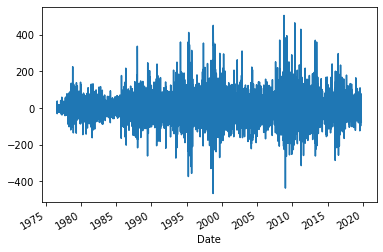

In [275]:
# Plot the Settle Noise
ts_noise.plot()

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [276]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [277]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
results = model.fit()

In [278]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sat, 24 Apr 2021   AIC                          15798.142
Time:                        19:21:41   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3059      1.278     -0.239      0.811      -2.810       2.198
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2943      1.278      0.230      0.818      -2.210       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3387           +0.0000j            3.3387            0.5000
AR.2         -157.3603           +0.0000j          157.3603            0.5000
MA.1           -3.3979           +0.0000j            3.3979            0.5000
-----------------------------------------------------------------------------
"""

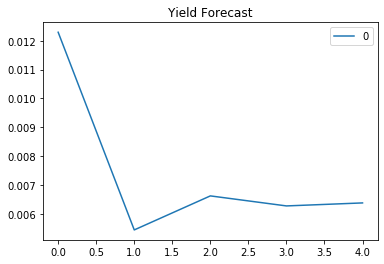

In [279]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Yield Forecast")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [280]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(df['Settle'], order=(2, 1, 2))

# Fit the model
results = model.fit()

C:\Users\tarks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\tarks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [281]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                10901
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -59615.570
Method:                       css-mle   S.D. of innovations             57.390
Date:                Sat, 24 Apr 2021   AIC                         119243.141
Time:                        19:21:46   BIC                         119286.920
Sample:                             1   HQIC                        119257.896
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5340      0.531      1.006      0.314      -0.507       1.575
ar.L1.D.Settle    -0.1304      0.365     -0.357      0.721      -0.847       0.586
ar.L2.D.Settle     0.4828      0.261      1.852      0.064      -0.028       0.994
ma.L1.D.Settle     0.1199      0.364      0.330      0.742      -0.593       0.833
ma.L2.D.Settle    -0.4945      0.261     -1.896      0.058      -1.005       0.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3105           +0.0000j            1.3105            0.5000
AR.2            1.5806           +0.0000j            1.5806            0.0000
MA.1           -1.3060           +0.0000j            1.3060            0.5000
MA.2            1.5486           +0.0000j            1.5486            0.0000
-----------------------------------------------------------------------------
"""

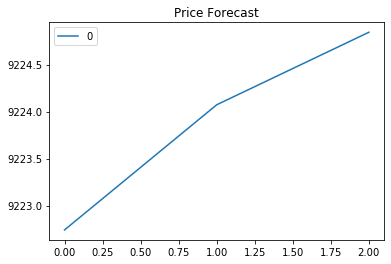

In [282]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Price Forecast")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [283]:
from arch import arch_model

In [284]:
# Estimate a GARCH model:
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

# Fit the model
res = model.fit(disp="off")

In [285]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14929.9
Method:            Maximum Likelihood   BIC:                           14950.6
                                        No. Observations:                 7514
Date:                Sat, Apr 24 2021   Df Residuals:                     7514
Time:                        19:21:47   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2895e-03  1.798e-03      2.385  1.707e-02 [7.646e-04,7.814e-03]
alpha[1]       0.0381  8.773e-03      4.341  1.419e-05 [2.089e-02,5.528e-02]
beta[1]        0.9536  1.114e-02     85.623      0.000     [  0.932,  0.975]
============================================================================

Covariance estimator: robust
"""

In [286]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [287]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
forecasts = res.forecast(start='2009-12-31', horizon=forecast_horizon)
forecasts

C:\Users\tarks\anaconda\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [288]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2009-12-31,12.285950,12.278888,12.271880,12.264927,12.258028
2010-01-04,12.183206,12.176943,12.170728,12.164562,12.158443
2010-01-05,12.275316,12.268336,12.261410,12.254539,12.247720
2010-01-06,12.234593,12.227929,12.221317,12.214756,12.208247
2010-01-07,12.236787,12.230106,12.223477,12.216900,12.210374


In [289]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2009-12-31,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2019-10-02,2019-10-03,2019-10-04,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-14,2019-10-15
h.1,12.285950,12.183206,12.275316,12.234593,12.236787,12.123070,12.020665,12.328359,12.172355,12.033256,...,7.601828,7.537698,7.434126,7.445491,7.363751,7.376183,7.367144,7.476215,7.389277,7.434026
h.2,12.278888,12.176943,12.268336,12.227929,12.230106,12.117277,12.015677,12.320969,12.166176,12.028169,...,7.641236,7.577972,7.475820,7.487028,7.406426,7.418683,7.409771,7.517329,7.431594,7.475721
h.3,12.271880,12.170728,12.261410,12.221317,12.223477,12.111529,12.010728,12.313636,12.160045,12.023122,...,7.680117,7.617701,7.516940,7.527994,7.448504,7.460591,7.451803,7.557880,7.473323,7.516842
h.4,12.264927,12.164562,12.254539,12.214756,12.216900,12.105826,12.005819,12.306360,12.153962,12.018115,...,7.718482,7.656897,7.557496,7.568400,7.490000,7.501920,7.493253,7.597881,7.514477,7.557400
h.5,12.258028,12.158443,12.247720,12.208247,12.210374,12.100167,12.000949,12.299140,12.147927,12.013147,...,7.756340,7.695569,7.597502,7.608258,7.530925,7.542682,7.534133,7.637342,7.555067,7.597407


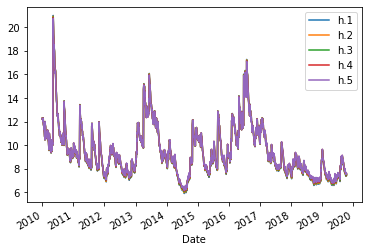

In [293]:
# Plot the final forecast
intermediate.plot()

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?

#Based on the returns, I would buy the yen now.
It is expected to increase.  Yes, I would use these methods for trading.